In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_severe = [
    "c:\\Users\\anany\\Downloads\\00000066-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[007].edf"
]

edf_files_normal = [
    "C:\\Users\\anany\\Downloads\\00000064-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[009].edf"
]

edf_files_moderate = [
    "C:\\Users\\anany\\Downloads\\00000074-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[009].edf"
]

edf_files_mild = [
    "C:\\Users\\anany\\Downloads\\00000067-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[011].edf",
]

labels = signal_labels(edf_files_normal[0])
print(labels)
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
cv_dict = {}

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow Patient', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [2]:
def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

In [3]:
def count_spo2_drops(spo2_data, timestamps, drop=0.03, duration=10):
    mean_spo2 = np.mean(spo2_data)  
    drop_start = None
    count = 0

    for i in range(1, len(spo2_data)):
        if (mean_spo2 - spo2_data[i])/mean_spo2 >= drop:
            if drop_start is None:
                drop_start = timestamps[i]  # Start timing the drop
        else:
            if drop_start is not None and (timestamps[i - 1] - drop_start) >= duration:
                count += 1  # Count the drop
            drop_start = None  # Reset the drop

    if drop_start is not None and (timestamps[-1] - drop_start) >= duration:
        count += 1

    return count

In [4]:
spo2_index = labels.index("SpO2")
pulse_index = labels.index("PulseRate")
npt_index = labels.index("Flow patient 1")
therm_index = labels.index("Flow patient 2")    

print("SpO2 index: ", spo2_index)
print("Pulse index: ", pulse_index)
print("Flow patient 1 index: ", npt_index)
print("Flow patient 2 index: ", therm_index)

SpO2 index:  20
Pulse index:  28
Flow patient 1 index:  16
Flow patient 2 index:  17


# NORMAL SPO2

In [5]:
def count_spo2_drops(spo2_data, timestamps, drop=0.03, duration=10):
    mean_spo2 = np.mean(spo2_data)  
    drop_start = None
    count = 0

    for i in range(1, len(spo2_data)):
        if (mean_spo2 - spo2_data[i])/mean_spo2 >= drop:
            if drop_start is None:
                drop_start = timestamps[i]  # Start timing the drop
        else:
            if drop_start is not None and (timestamps[i - 1] - drop_start) >= duration:
                count += 1  # Count the drop
            drop_start = None  # Reset the drop

    if drop_start is not None and (timestamps[-1] - drop_start) >= duration:
        count += 1

    return count


In [6]:
for j in range(9):
    spo2_data = read_file_signal(edf_files_normal[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    timestamps = np.linspace(0, 3600, len(spo2_denoised))
    # print(len(spo2_denoised))
    count = count_spo2_drops(spo2_denoised, timestamps, 0.03, 10)
    print(f"Number of SpO2 drops in hour {j + 1}: {count}")


Number of SpO2 drops in hour 1: 0
Number of SpO2 drops in hour 2: 0
Number of SpO2 drops in hour 3: 0
Number of SpO2 drops in hour 4: 0
Number of SpO2 drops in hour 5: 0
Number of SpO2 drops in hour 6: 0
Number of SpO2 drops in hour 7: 1
Number of SpO2 drops in hour 8: 0
Number of SpO2 drops in hour 9: 0


In [7]:
combined_spo2 = combined_signal(edf_files_normal, spo2_index)
combined_spo2_denoised = thresholding(combined_spo2, 2)
mean = np.mean(combined_spo2_denoised)
timestamps = np.linspace(0, 32400, len(combined_spo2_denoised))
count = count_spo2_drops(combined_spo2_denoised, timestamps, 0.03, 10)
print(f"Number of SpO2 drops in overall in normal: {count}")

Number of SpO2 drops in overall in normal: 2


In [8]:
for j in range(11):
    spo2_data = read_file_signal(edf_files_mild[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    timestamps = np.linspace(0, 3600, len(spo2_denoised))
    # print(len(spo2_denoised))
    count = count_spo2_drops(spo2_denoised, timestamps, 0.03, 10)
    print(f"Number of SpO2 drops in hour {j + 1}: {count}")

Number of SpO2 drops in hour 1: 2
Number of SpO2 drops in hour 2: 0
Number of SpO2 drops in hour 3: 0
Number of SpO2 drops in hour 4: 0
Number of SpO2 drops in hour 5: 0
Number of SpO2 drops in hour 6: 0
Number of SpO2 drops in hour 7: 0
Number of SpO2 drops in hour 8: 0
Number of SpO2 drops in hour 9: 0
Number of SpO2 drops in hour 10: 0
Number of SpO2 drops in hour 11: 0


In [9]:
combined_spo2 = combined_signal(edf_files_mild, spo2_index)
combined_spo2_denoised = thresholding(combined_spo2, 2)
mean = np.mean(combined_spo2_denoised)
timestamps = np.linspace(0, 39600, len(combined_spo2_denoised))
count = count_spo2_drops(combined_spo2_denoised, timestamps, 0.03, 10)
print(f"Number of SpO2 drops in 7 hours: {count}")

Number of SpO2 drops in 7 hours: 23


In [10]:
for j in range(9):
    spo2_data = read_file_signal(edf_files_moderate[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    timestamps = np.linspace(0, 3600, len(spo2_denoised))
    # print(len(spo2_denoised))
    count = count_spo2_drops(spo2_denoised, timestamps, 0.03, 10)
    print(f"Number of SpO2 drops in hour {j + 1}: {count}")

Number of SpO2 drops in hour 1: 1
Number of SpO2 drops in hour 2: 0
Number of SpO2 drops in hour 3: 6
Number of SpO2 drops in hour 4: 0
Number of SpO2 drops in hour 5: 0
Number of SpO2 drops in hour 6: 0
Number of SpO2 drops in hour 7: 0
Number of SpO2 drops in hour 8: 0
Number of SpO2 drops in hour 9: 0


In [11]:
combined_spo2 = combined_signal(edf_files_moderate, spo2_index)
combined_spo2_denoised = thresholding(combined_spo2, 2)
mean = np.mean(combined_spo2_denoised)
timestamps = np.linspace(0, 32400, len(combined_spo2_denoised))
count = count_spo2_drops(combined_spo2_denoised, timestamps, 0.03, 10)
print(f"Number of SpO2 drops in 7 hours: {count}")

Number of SpO2 drops in 7 hours: 31


In [12]:
for j in range(7):
    spo2_data = read_file_signal(edf_files_severe[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    timestamps = np.linspace(0, 3600, len(spo2_denoised))
    # print(len(spo2_denoised))
    count = count_spo2_drops(spo2_denoised, timestamps, 0.03, 10)
    print(f"Number of SpO2 drops in hour {j + 1}: {count}")

Number of SpO2 drops in hour 1: 29
Number of SpO2 drops in hour 2: 42
Number of SpO2 drops in hour 3: 43
Number of SpO2 drops in hour 4: 37
Number of SpO2 drops in hour 5: 0
Number of SpO2 drops in hour 6: 0
Number of SpO2 drops in hour 7: 8


In [13]:
combined_spo2 = combined_signal(edf_files_severe, spo2_index)
combined_spo2_denoised = thresholding(combined_spo2, 2)
mean = np.mean(combined_spo2_denoised)
timestamps = np.linspace(0, 25200, len(combined_spo2_denoised))
count = count_spo2_drops(combined_spo2_denoised, timestamps, 0.03, 10)
print(f"Number of SpO2 drops in 7 hours: {count}")

Number of SpO2 drops in 7 hours: 196


# THERMISTOR

In [17]:
def count_ob_apnea(fp2_signal, timestamps):
    mean_fp2 = np.mean(fp2_signal)
    count = 0
    apnea_start = None
    time_drops = []
    for i in range(1, len(fp2_signal)):
        if (mean_fp2 - fp2_signal[i])/mean_fp2 >= 0.9:
            if apnea_start is None:
                apnea_start = timestamps[i]
        else:
            if apnea_start is not None and (timestamps[i - 1] - apnea_start) >= 1000:
                count += 1  # Count the drop
                time_drops.append((apnea_start, timestamps[i - 1]))
            apnea_start = None  # Reset the drop

    if apnea_start is not None and (timestamps[-1] - apnea_start) >= 1000:
        count += 1
        time_drops.append((apnea_start, timestamps[-1]))

    return count, time_drops


In [65]:
import numpy as np

def spo2_drops(fp2_signal, timestamps, drop_threshold=0.9, duration_threshold=1000):
    count = 0
    drop_start = None
    baseline_spo2 = None

    for i in range(1, len(fp2_signal)):
        # Identify if this is the start of a drop (check for a baseline point)
        if baseline_spo2 is None:
            baseline_spo2 = fp2_signal[i - 1]  # Set the baseline just before the drop

        # Check if SpO2 has dropped by the threshold from baseline
        if (baseline_spo2 - fp2_signal[i])/baseline_spo2 >= drop_threshold:
            if drop_start is None:
                drop_start = timestamps[i]  # Start timing the drop
        else:
            # If a drop has occurred and it lasted long enough
            if drop_start is not None and (timestamps[i - 1] - drop_start) >= duration_threshold:
                count += 1  # Count the drop
            drop_start = None  # Reset the drop
            baseline_spo2 = fp2_signal[i]  # Update the baseline after the drop

    # Check if the last detected drop meets the duration requirement
    if drop_start is not None and (timestamps[-1] - drop_start) >= duration_threshold:
        count += 1

    return count


In [18]:
def plot_signal_with_drops(fp2_signal, timestamps):
    count, time_drops = count_ob_apnea(fp2_signal, timestamps)
    
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, fp2_signal, label='FP2 Signal')
    
    for start, end in time_drops:
        plt.axvspan(start, end, color='red', alpha=0.5, label='Apnea Drop' if start == time_drops[0][0] else "")
    
    plt.xlabel('Time')
    plt.ylabel('FP2 Signal')
    plt.title('FP2 Signal with Apnea Drops Highlighted')
    plt.legend()
    plt.show()

Number of fp2 drops in hour 1: 0
Time of drops: []


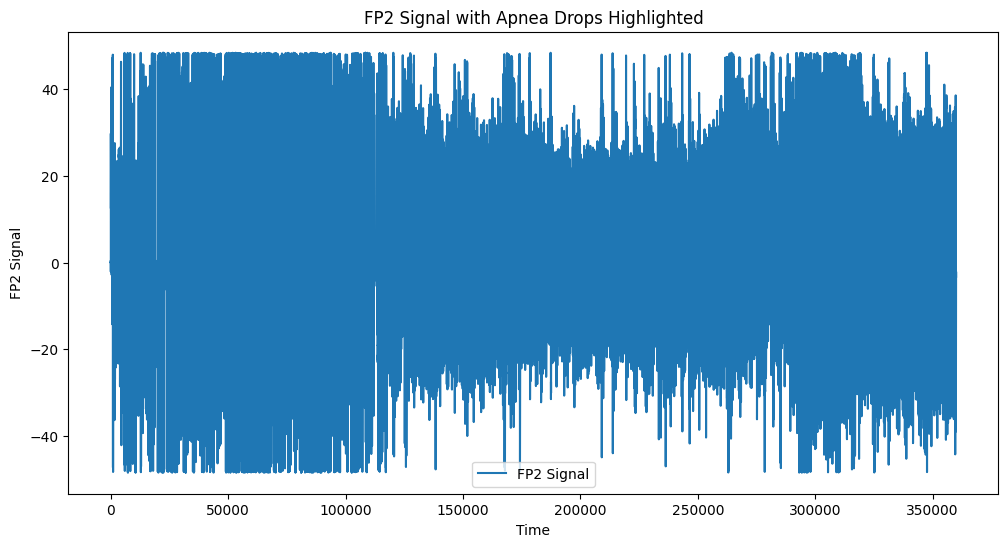

Number of fp2 drops in hour 2: 0
Time of drops: []


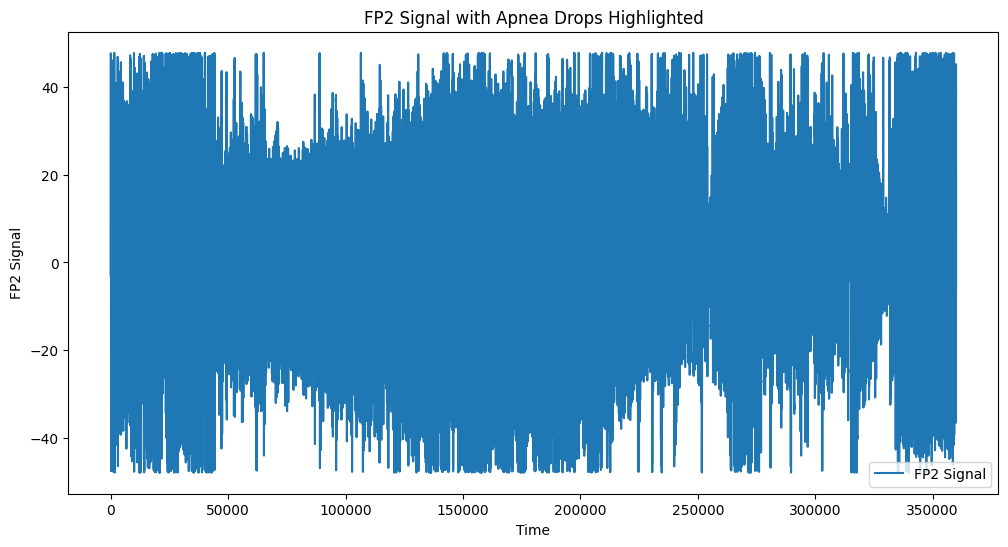

Number of fp2 drops in hour 3: 0
Time of drops: []


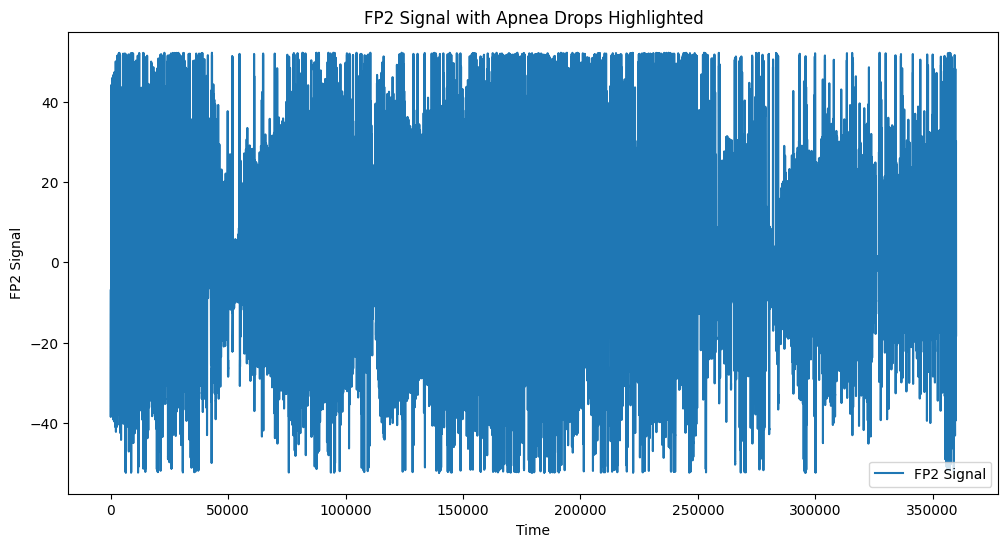

Number of fp2 drops in hour 4: 0
Time of drops: []


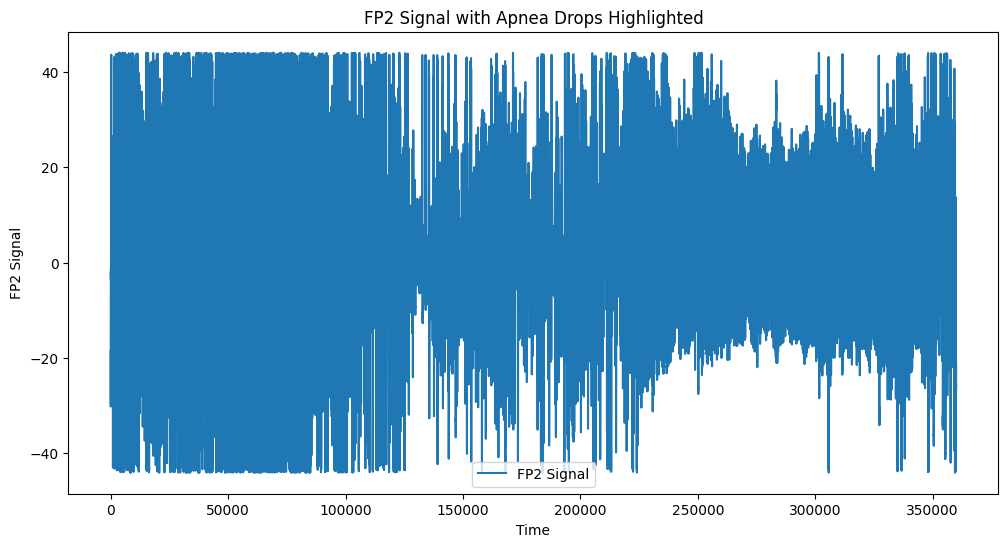

Number of fp2 drops in hour 5: 0
Time of drops: []


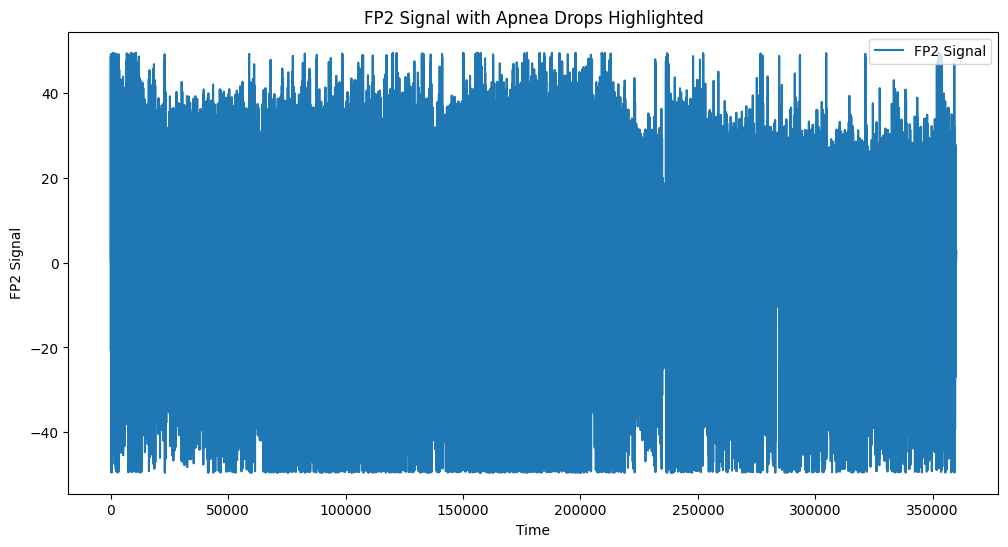

Number of fp2 drops in hour 6: 0
Time of drops: []


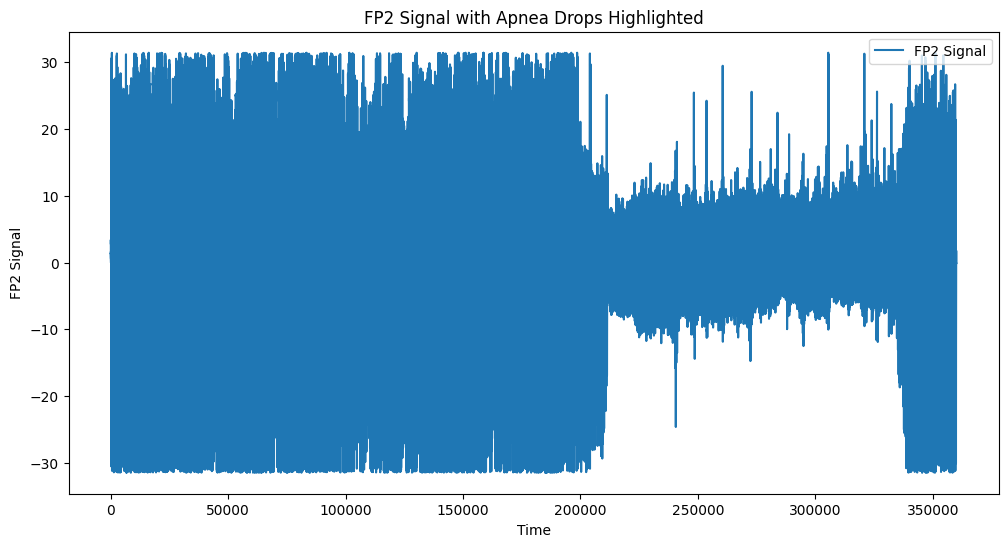

Number of fp2 drops in hour 7: 0
Time of drops: []


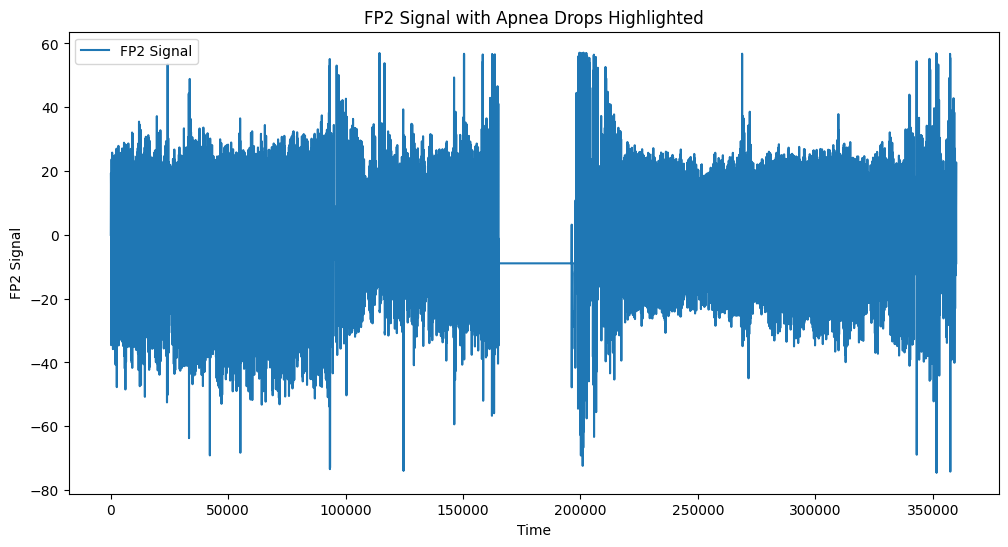

Number of fp2 drops in hour 8: 0
Time of drops: []


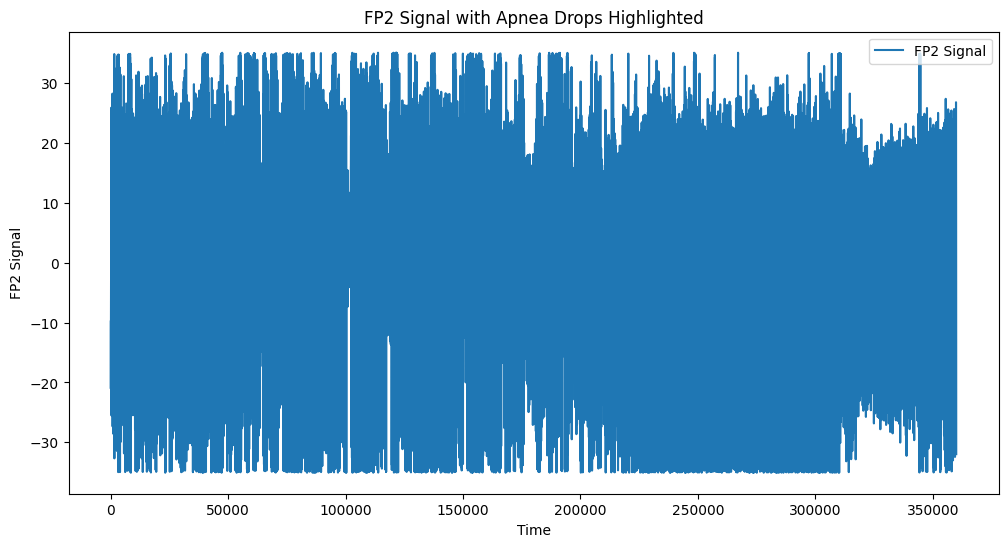

Number of fp2 drops in hour 9: 3
Time of drops: [(33814.916120461814, 34895.91741659325), (134741.58091135108, 135827.56378027576), (137984.58479974538, 139034.03613485303)]


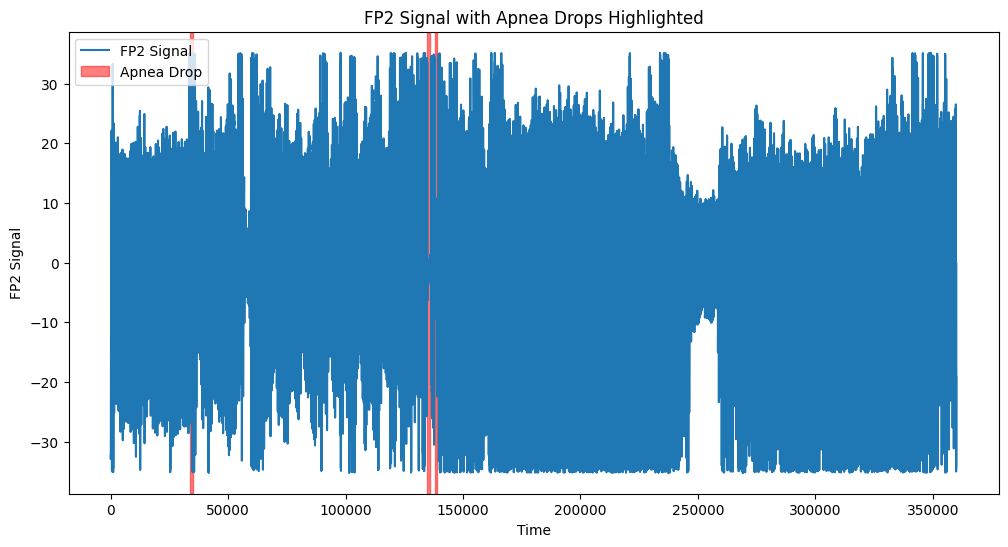

In [19]:
for j in range(9):
    fp2_data = read_file_signal(edf_files_normal[j], therm_index)
    fp2_denoised = thresholding(fp2_data, 2)
    timestamps = np.linspace(0, 360000, len(fp2_denoised))
    # print(len(fp2_denoised))
    count, time_drops = count_ob_apnea(fp2_denoised, timestamps)
    print(f"Number of fp2 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signal_with_drops(fp2_denoised, timestamps)

Number of fp2 drops in hour 1: 0
Time of drops: []


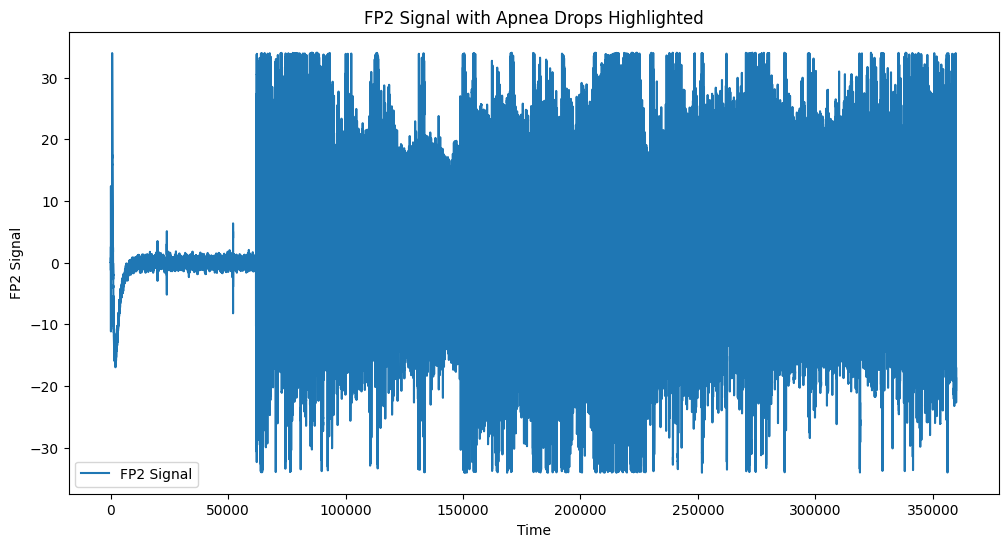

Number of fp2 drops in hour 2: 0
Time of drops: []


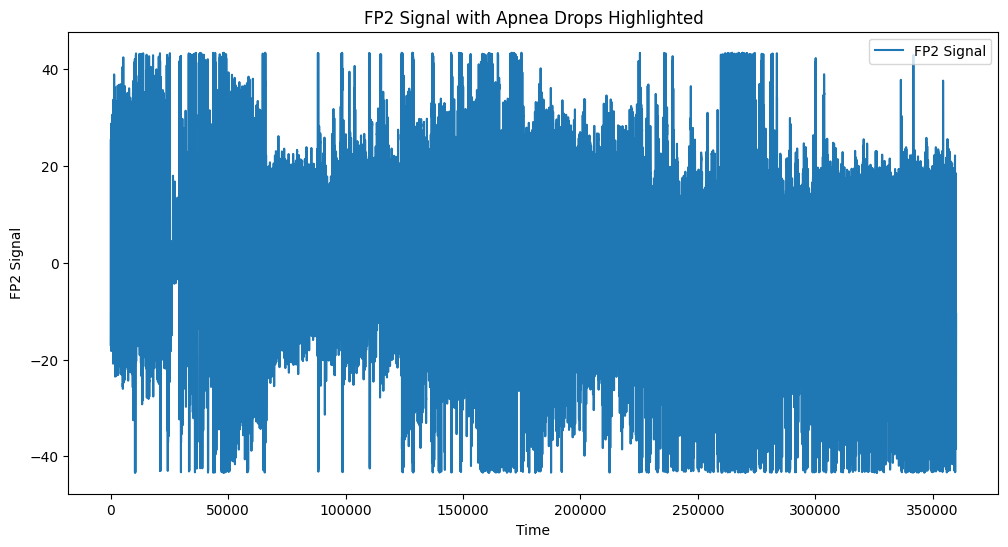

Number of fp2 drops in hour 3: 0
Time of drops: []


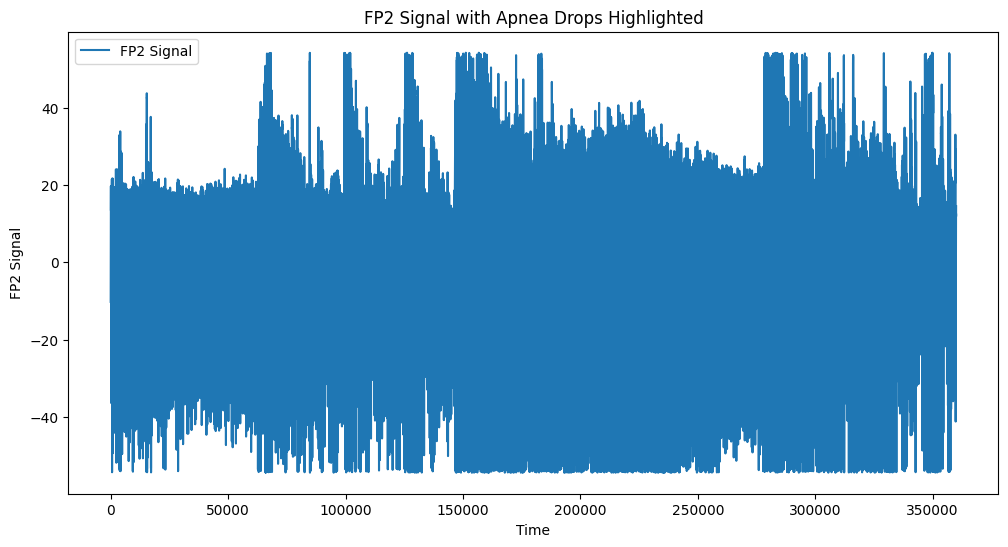

Number of fp2 drops in hour 4: 0
Time of drops: []


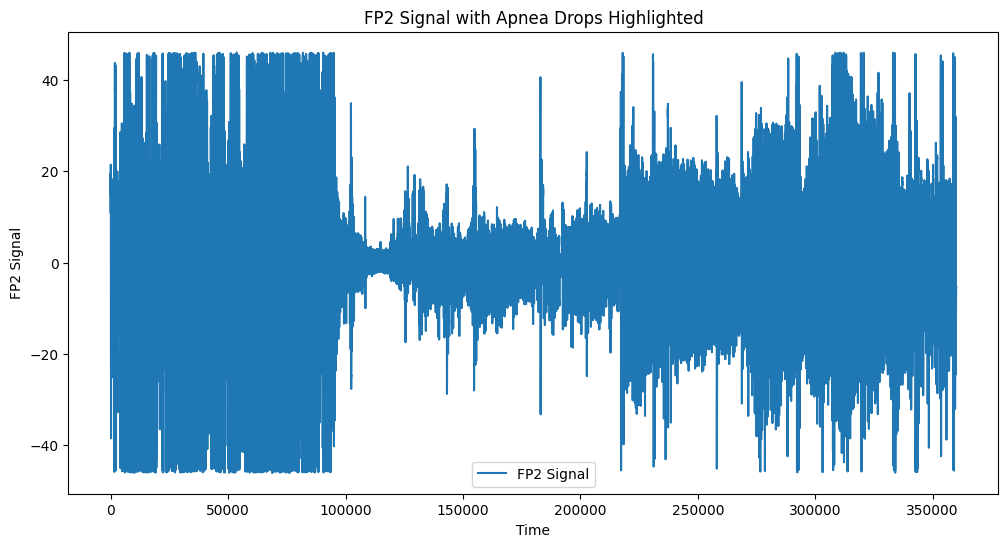

Number of fp2 drops in hour 5: 0
Time of drops: []


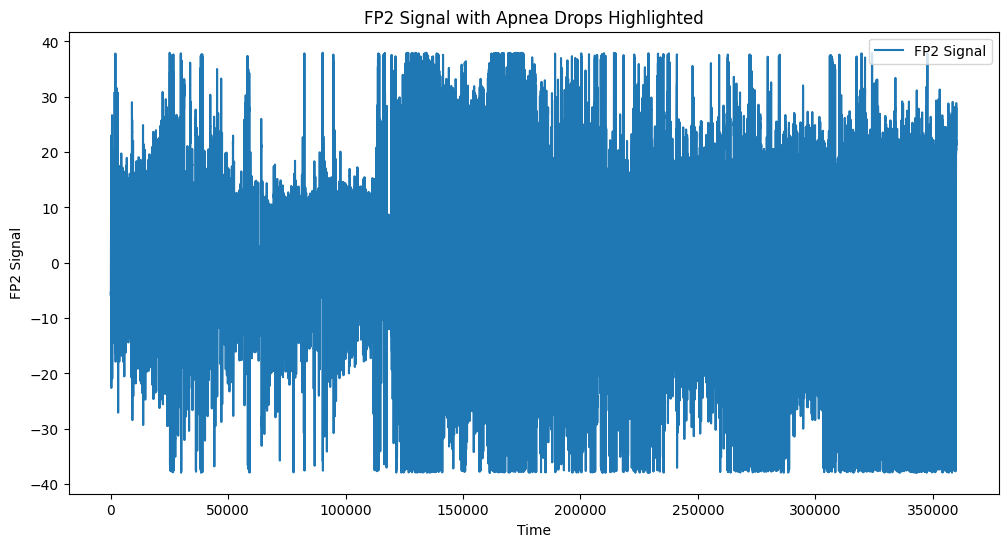

Number of fp2 drops in hour 6: 0
Time of drops: []


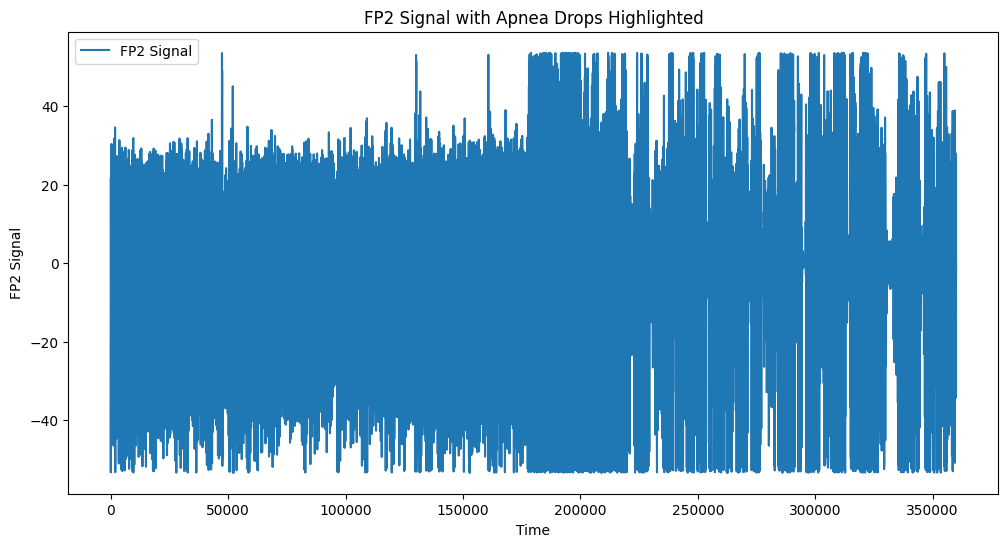

Number of fp2 drops in hour 7: 2
Time of drops: [(286194.7949855416, 289868.80519112555), (306681.851894033, 310714.86309684196)]


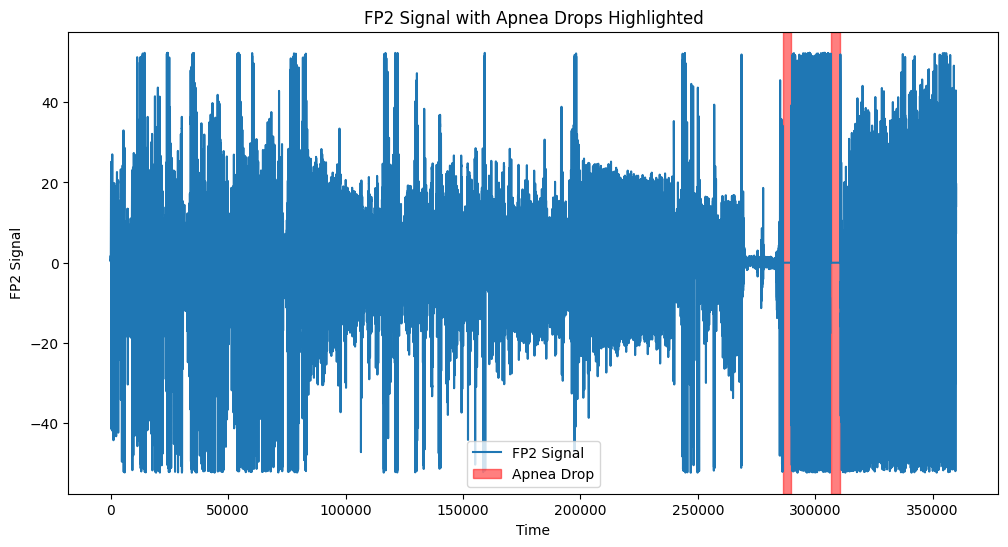

Number of fp2 drops in hour 8: 0
Time of drops: []


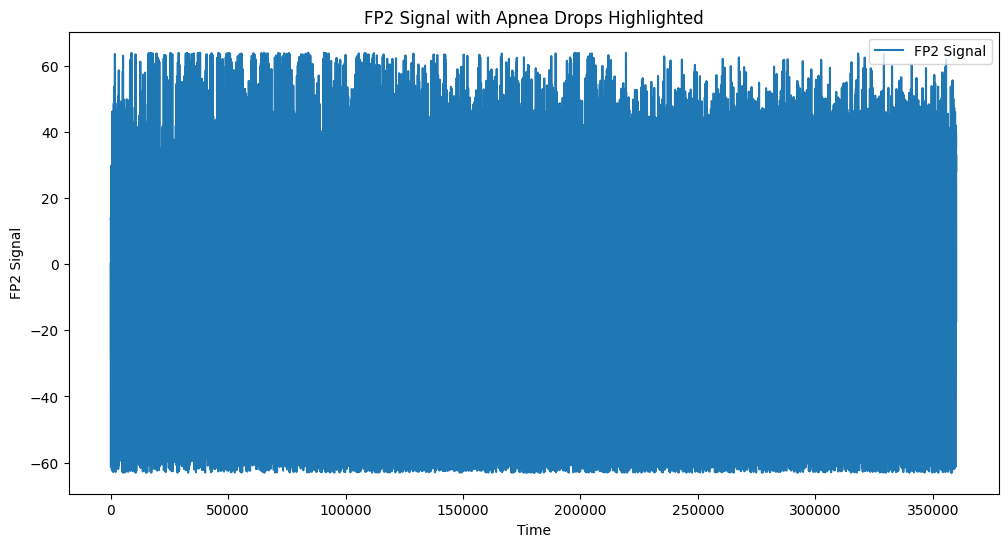

Number of fp2 drops in hour 9: 0
Time of drops: []


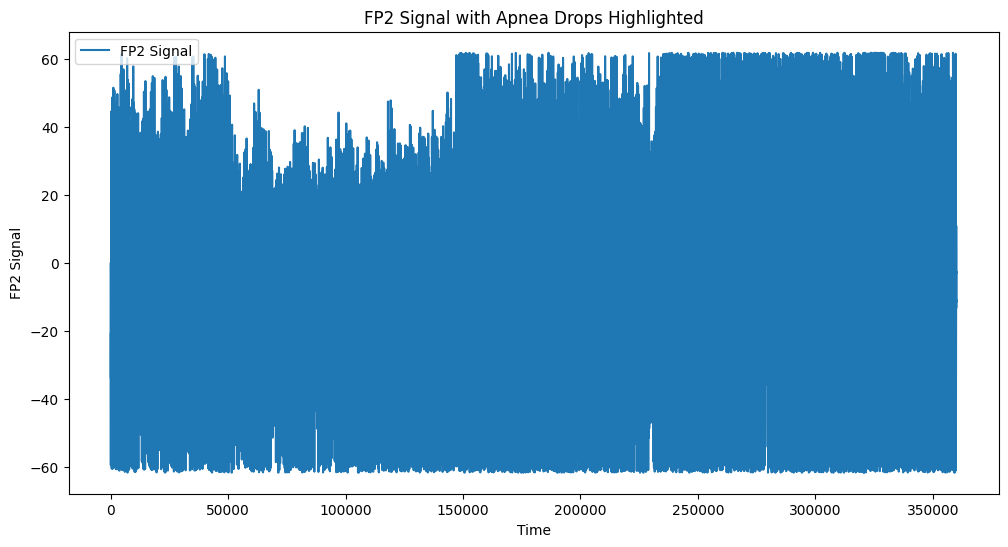

Number of fp2 drops in hour 10: 0
Time of drops: []


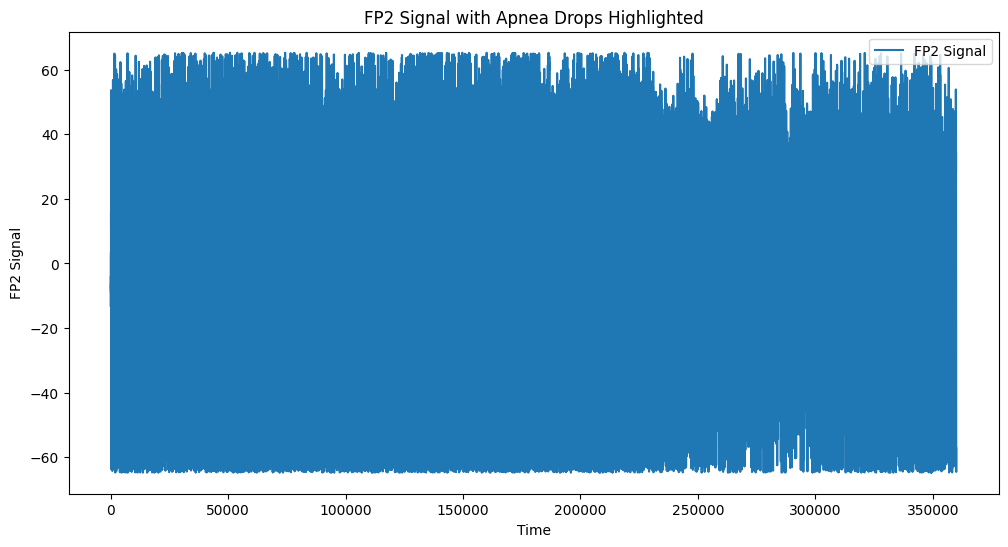

Number of fp2 drops in hour 11: 57
Time of drops: [(119.76751012739975, 1775.3772089473375), (3212.5873304761344, 4727.294076205014), (6023.601244642752, 7397.405037280573), (15147.067457288793, 16175.65901485352), (18916.22145247461, 20226.61891622145), (21234.07503082252, 22692.420595314976), (27208.3602418834, 28610.344625139434), (38586.27370398638, 40079.8450067516), (41207.06863148007, 42573.82727646334), (44426.70110961075, 45870.95637879411), (47597.017554159575, 48977.86649445195), (50619.38589796278, 51725.47407972759), (53599.48335583867, 54902.83567193096), (59136.96941231727, 60503.728057300534), (65329.65420066929, 66985.26389948922), (68098.3972289086, 69239.71114894617), (88789.99589033054, 89804.49715258616), (106029.47220102155, 107029.88316796806), (108044.38443022368, 109044.7953971702), (112489.87260024658, 113546.64474842952), (120140.90295309106, 121331.5329067105), (126932.42529208008, 128038.51347384488), (135957.25943756237, 136957.67040450888), (141987.905829

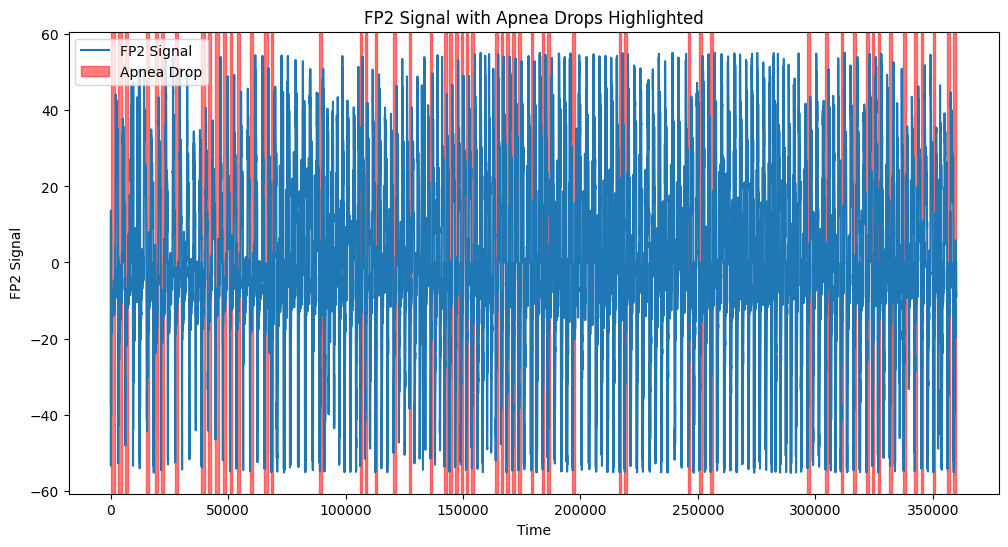

In [21]:
for j in range(11):
    fp2_data = read_file_signal(edf_files_mild[j], therm_index)
    fp2_denoised = thresholding(fp2_data, 2)
    timestamps = np.linspace(0, 360000, len(fp2_denoised))
    # print(len(fp2_denoised))
    count, time_drops = count_ob_apnea(fp2_denoised, timestamps)
    print(f"Number of fp2 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signal_with_drops(fp2_denoised, timestamps)

Number of fp2 drops in hour 1: 0
Time of drops: []


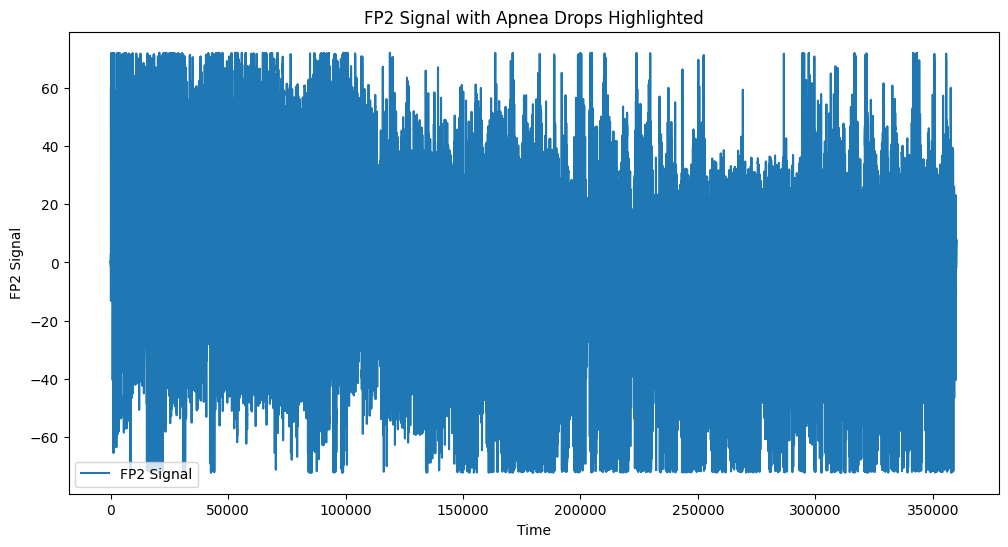

Number of fp2 drops in hour 2: 0
Time of drops: []


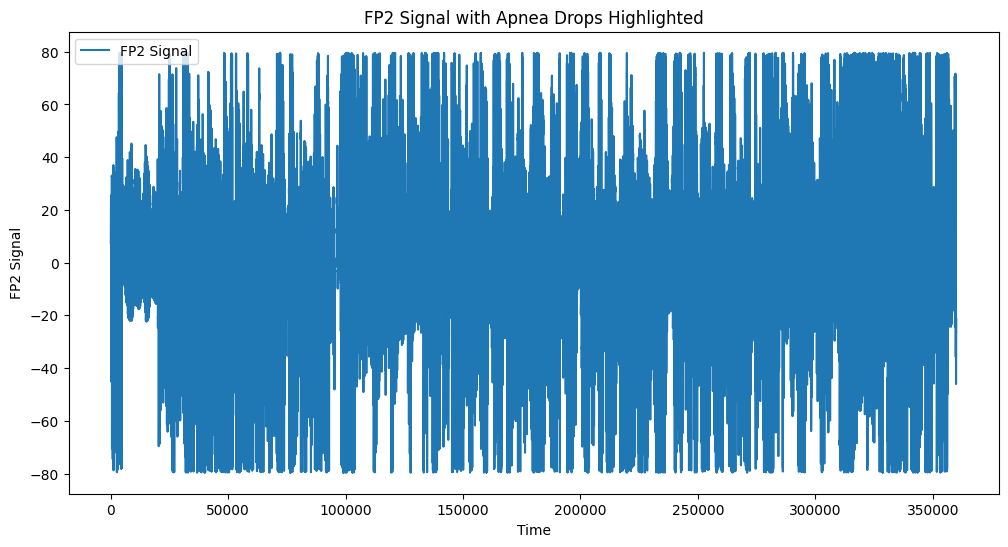

Number of fp2 drops in hour 3: 2
Time of drops: [(144789.40219278386, 145817.40504834737), (159292.4424790069, 161339.4481651338)]


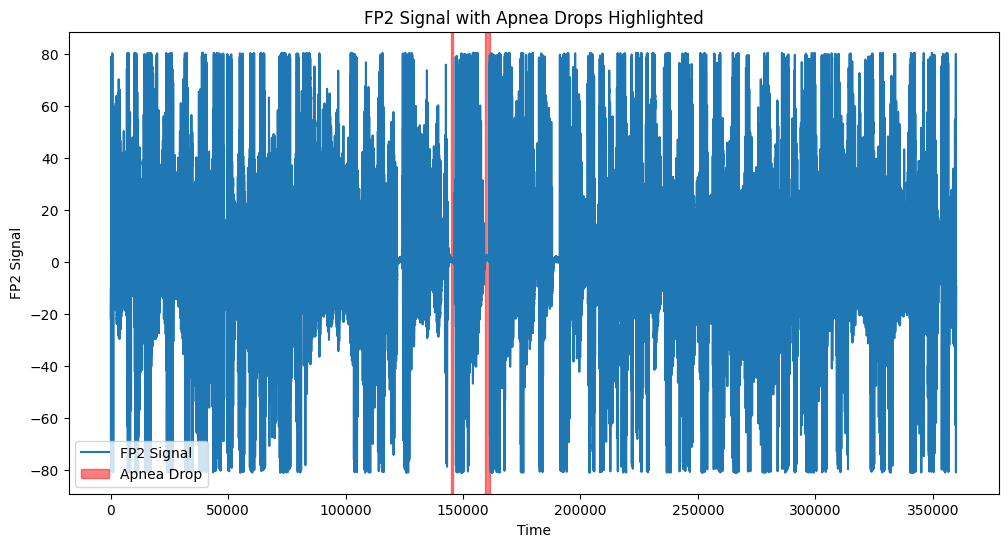

Number of fp2 drops in hour 4: 4
Time of drops: [(179180.49772360479, 181213.5033708427), (184985.51384864957, 187274.52020700058), (190476.52910146973, 192093.53359314887), (242186.6727407576, 243312.6758685441)]


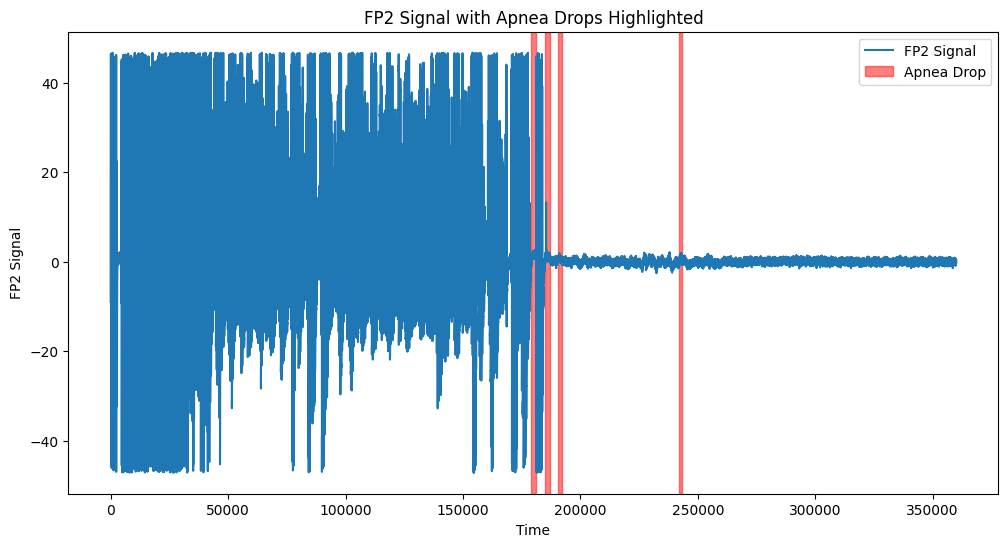

Number of fp2 drops in hour 5: 0
Time of drops: []


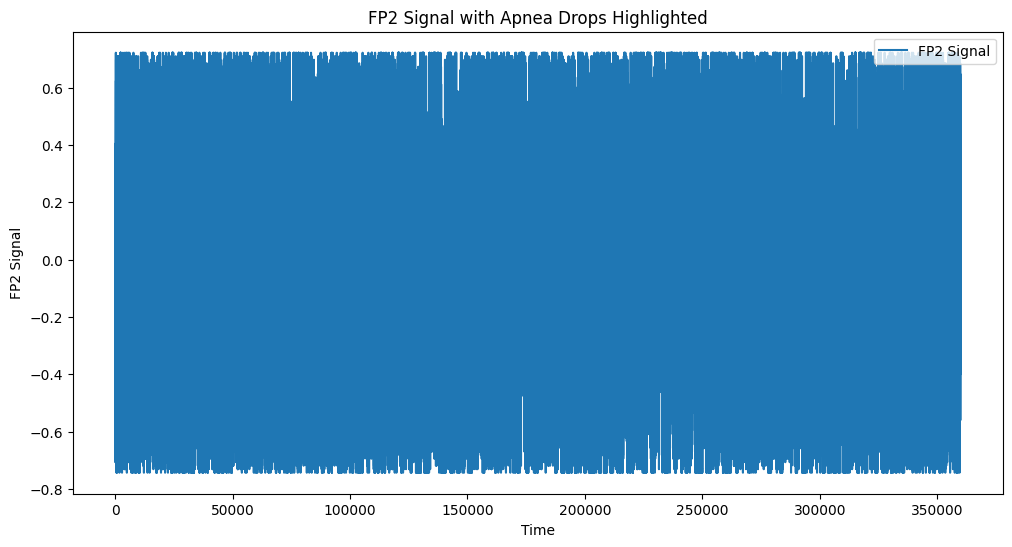

Number of fp2 drops in hour 6: 0
Time of drops: []


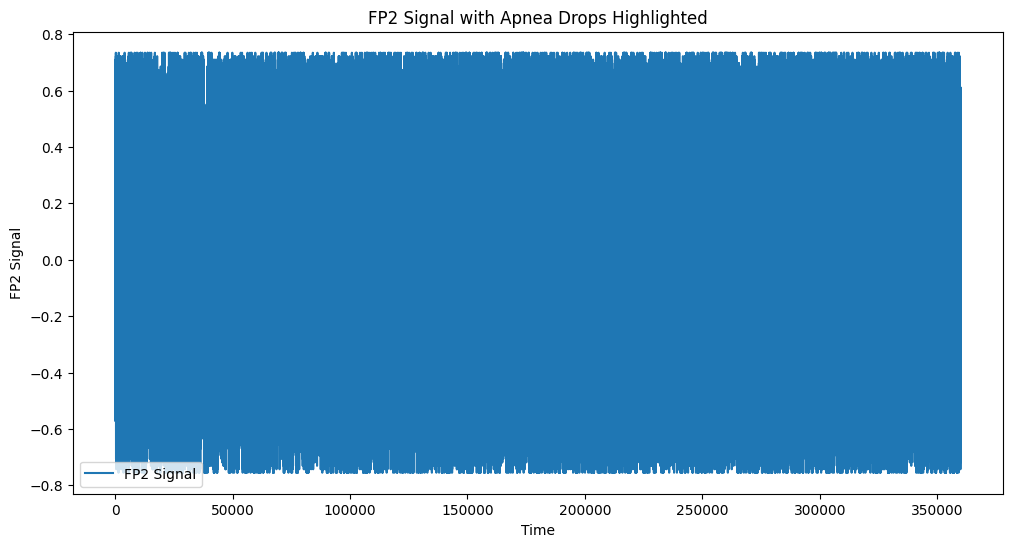

Number of fp2 drops in hour 7: 0
Time of drops: []


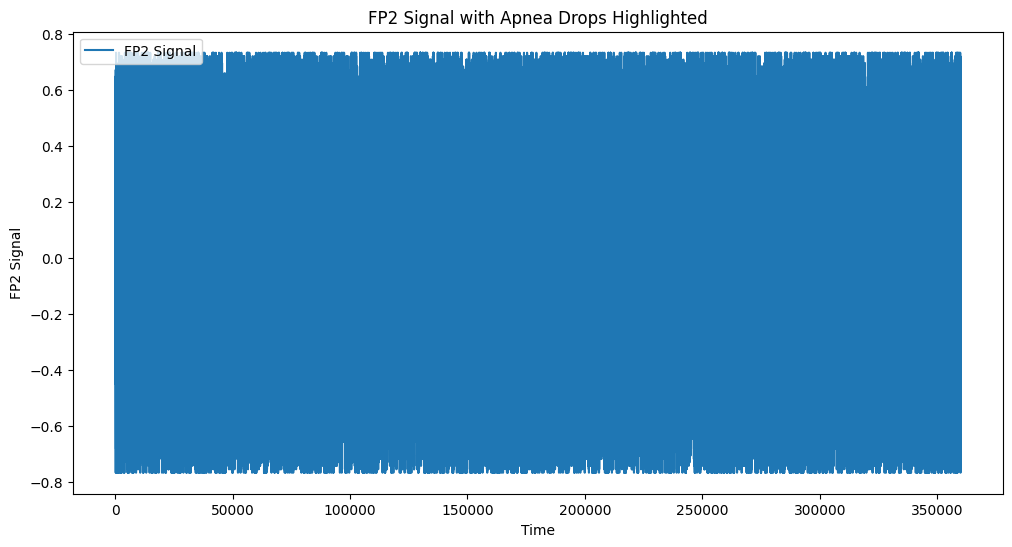

Number of fp2 drops in hour 8: 0
Time of drops: []


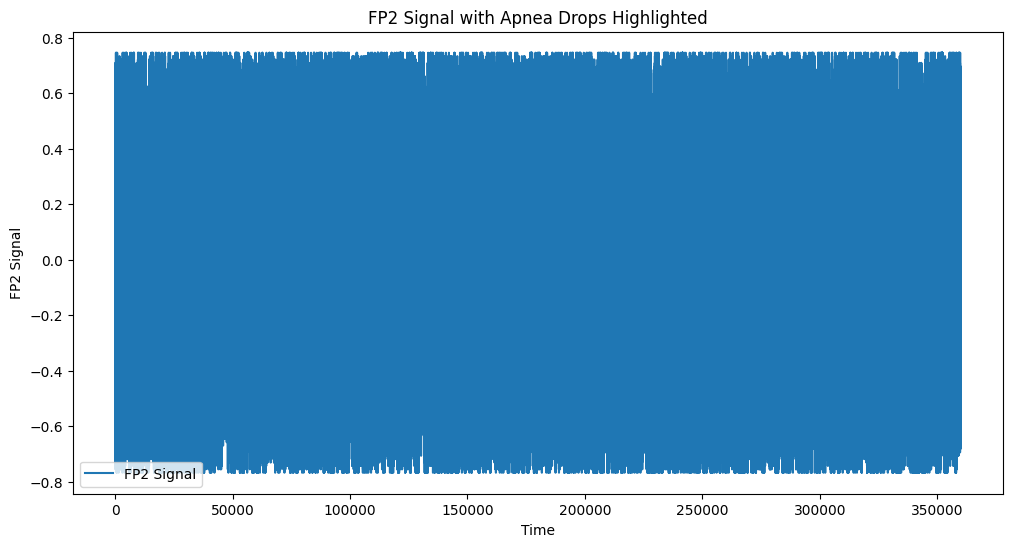

Number of fp2 drops in hour 9: 0
Time of drops: []


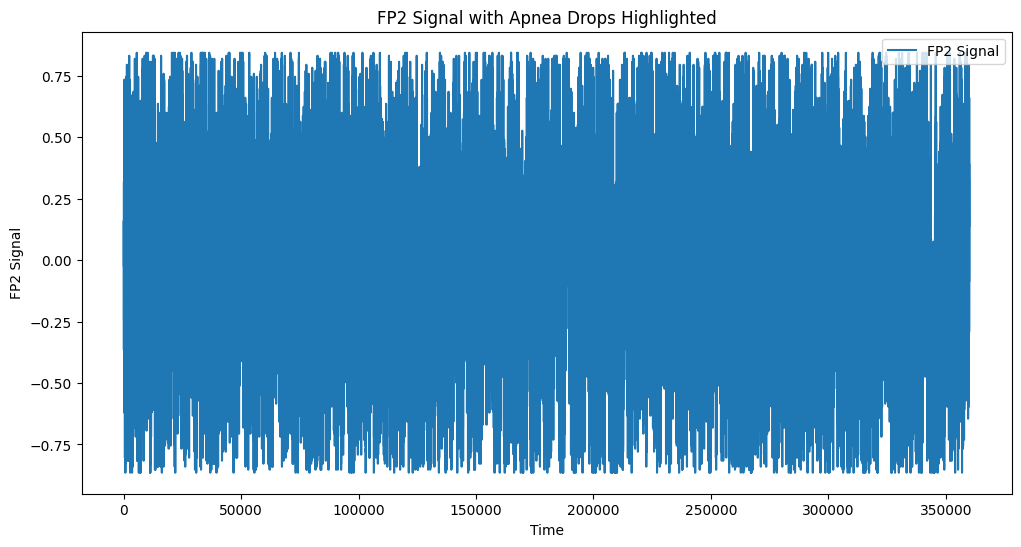

In [22]:
for j in range(9):
    fp2_data = read_file_signal(edf_files_moderate[j], therm_index)
    fp2_denoised = thresholding(fp2_data, 2)
    timestamps = np.linspace(0, 360000, len(fp2_denoised))
    # print(len(fp2_denoised))
    count, time_drops = count_ob_apnea(fp2_denoised, timestamps)
    print(f"Number of fp2 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signal_with_drops(fp2_denoised, timestamps)

Number of fp2 drops in hour 1: 27
Time of drops: [(139891.3885871905, 140990.3916399768), (149562.41545115403, 150672.41853449593), (160550.44597346103, 161858.44960680447), (163518.45421792837, 164636.45732349256), (172171.47825410627, 173251.4812541146), (184506.51251809034, 186263.51739865943), (187926.52201811672, 189968.5276903547), (217620.60450167916, 219000.60833502316), (230230.63952955426, 231409.64280456334), (239534.6653740705, 240631.66842130118), (242532.6737018714, 243616.67671299085), (245997.68332689814, 248397.6899935833), (271298.7536076489, 272533.757038214), (274350.76208545023, 275405.76501601393), (280209.77836049546, 281692.78247995133), (286858.7968299912, 288333.8009272248), (290609.80724946456, 291724.8103466954), (293790.81608560024, 295293.8202606118), (296936.8248245134, 298731.8298106384), (300352.83431342867, 302685.84079400223), (309467.8596329434, 310480.86244684015), (318270.88408578915, 319451.88736635377), (323220.8978358273, 324525.9014608374), (32

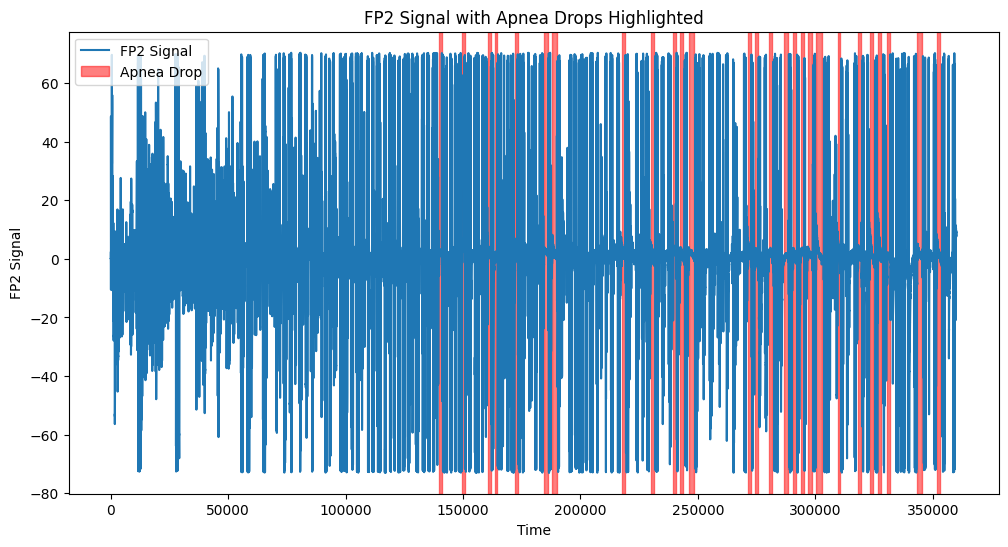

Number of fp2 drops in hour 2: 65
Time of drops: [(4028.0111889199693, 5468.01518893108), (7809.021691726922, 9232.02564451568), (20908.058077939106, 22114.06142794841), (26888.07468909636, 27959.07766410462), (27961.077669660193, 29100.08083355787), (31076.086322462008, 32331.0898085828), (43006.11946144295, 44430.12341700949), (49474.13742815952, 50868.141300392504), (55119.15310875863, 56239.15621987839), (57775.16048655691, 58852.16347823189), (60542.168172689366, 62055.17237547882), (64596.17943383176, 65875.1829866194), (67310.18697274159, 69090.19191719977), (76035.21120892002, 77166.21435059542), (82553.22931452587, 83817.23282564674), (87655.24348678747, 89534.2487062464), (92173.25603682232, 94739.2631646199), (96912.26920074777, 99121.27533687593), (100684.27967855467, 102119.28366467684), (103349.287081353, 105668.29352303756), (107734.29926194239, 110464.30684529679), (111807.3105758627, 113503.31528698691), (121427.33729815917, 123730.34369539915), (132219.3672760202, 133

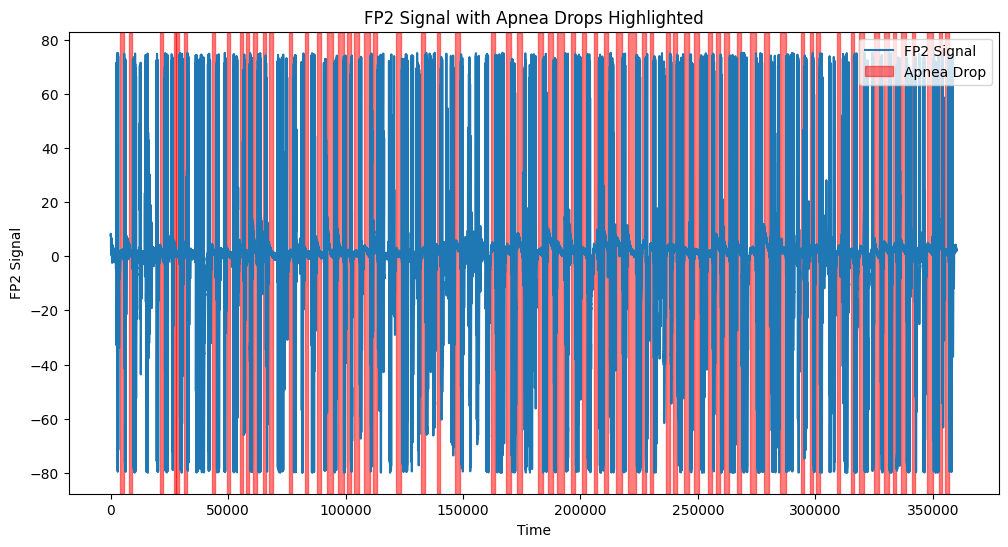

Number of fp2 drops in hour 3: 3
Time of drops: [(200422.55672932425, 202256.56182378283), (297509.8264161845, 298547.8292995258), (338312.939758166, 339564.94323595345)]


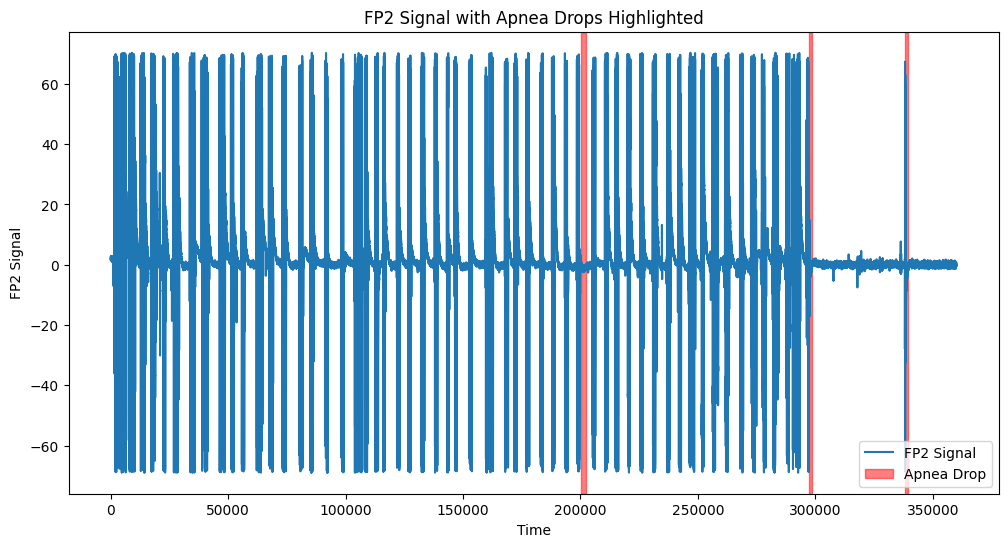

Number of fp2 drops in hour 4: 1
Time of drops: [(9387.02607507243, 10680.029666749075)]


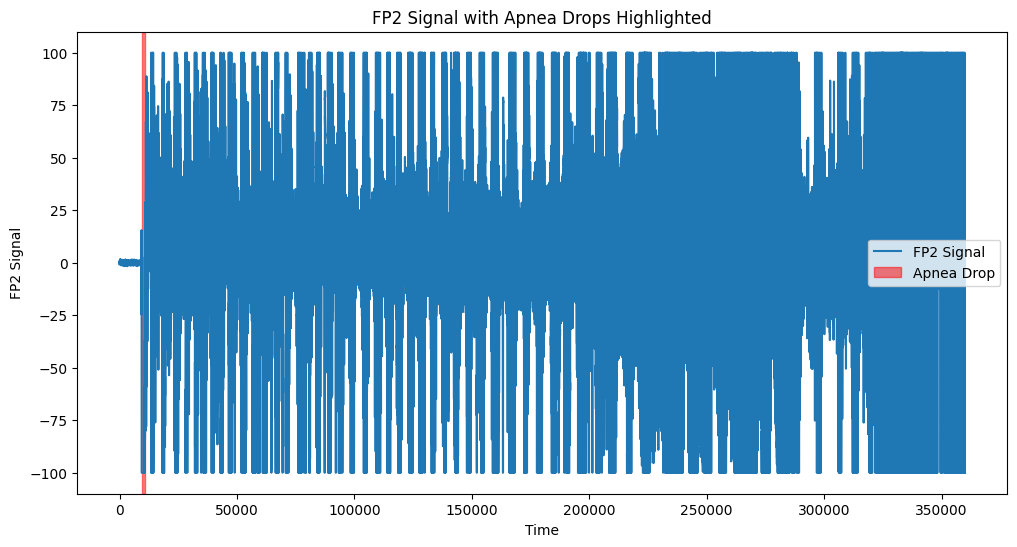

Number of fp2 drops in hour 5: 0
Time of drops: []


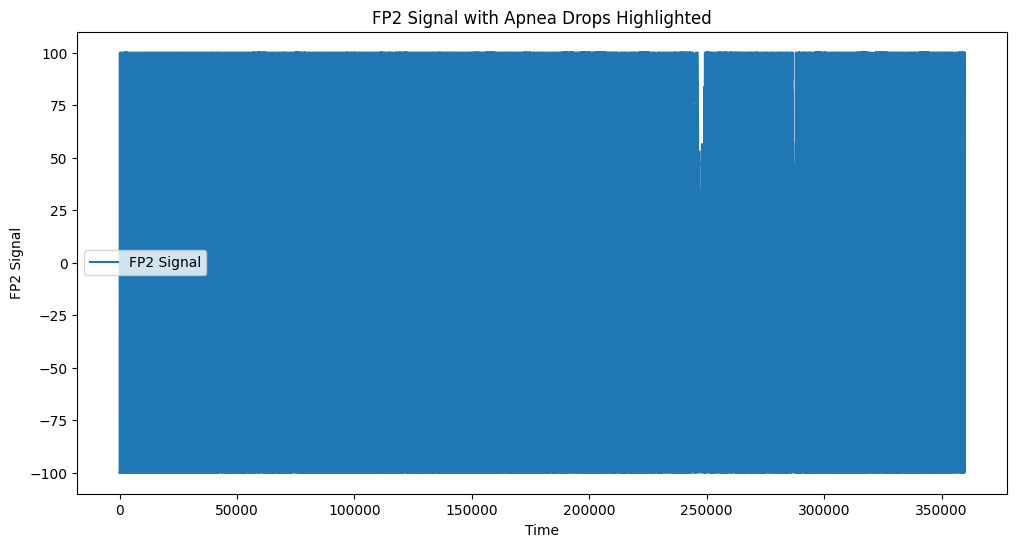

Number of fp2 drops in hour 6: 0
Time of drops: []


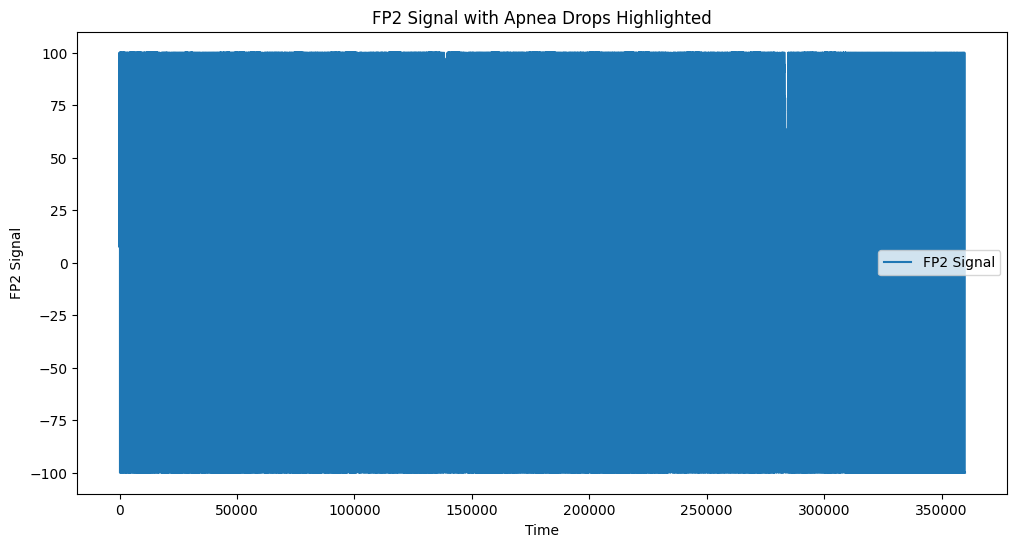

Number of fp2 drops in hour 7: 0
Time of drops: []


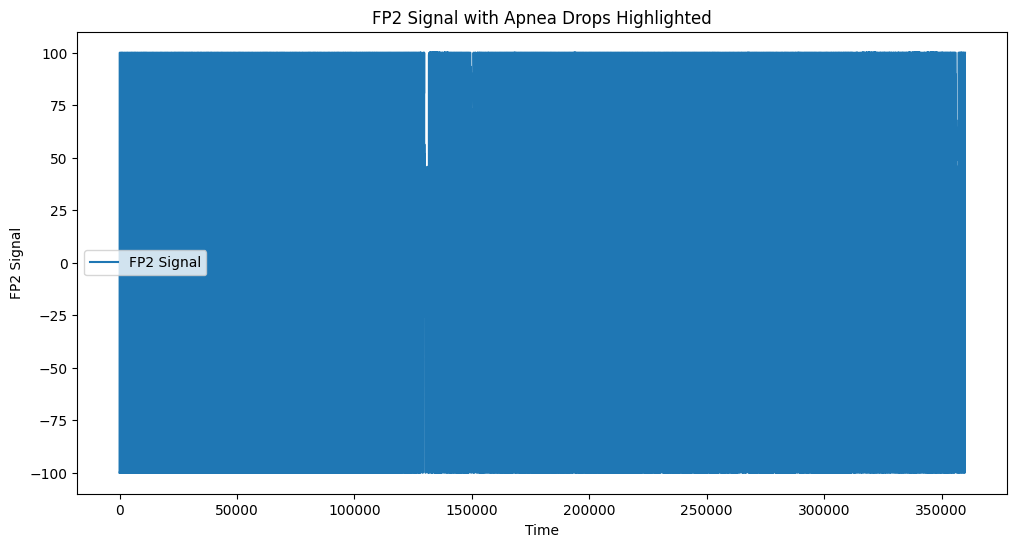

In [25]:
for j in range(7):
    fp2_data = read_file_signal(edf_files_severe[j], therm_index)
    fp2_denoised = thresholding(fp2_data, 2)
    timestamps = np.linspace(0, 360000, len(fp2_denoised))
    # print(len(fp2_denoised))
    count, time_drops = count_ob_apnea(fp2_denoised, timestamps)
    print(f"Number of fp2 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signal_with_drops(fp2_denoised, timestamps)

In [66]:
combined_fp2 = combined_signal(edf_files_severe, therm_index)
combined_fp2_denoised = thresholding(combined_fp2, 2)
mean = np.mean(combined_fp2_denoised)
timestamps = np.linspace(0, 2520000, len(combined_fp2_denoised))
count = spo2_drops(combined_fp2_denoised, timestamps, 0.9, 1000)
print(f"Number of fp2 drops in 7 hours: {count}")

Number of fp2 drops in 7 hours: 15


In [64]:
combined_fp2 = combined_signal(edf_files_normal, therm_index)
combined_fp2_denoised = thresholding(combined_fp2, 2)
mean = np.mean(combined_fp2_denoised)
timestamps = np.linspace(0, 3240000, len(combined_fp2_denoised))
# count, time_drops = count_ob_apnea(combined_fp2_denoised, timestamps)
count = spo2_drops(combined_fp2_denoised, timestamps, 0.9, 10)
print(f"Number of fp2 drops in 9 hours: {count}")
# print(f"Time of drops: {time_drops}")

Number of fp2 drops in 9 hours: 12884


In [152]:
combined_fp2 = combined_signal(edf_files_moderate, therm_index)
combined_fp2_denoised = thresholding(combined_fp2, 2)
mean = np.mean(combined_fp2_denoised)
timestamps = np.linspace(0, 3240000, len(combined_fp2_denoised))
count, time_drops = count_ob_apnea(combined_fp2_denoised, timestamps)
print(f"Number of fp2 drops in 9 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp2 drops in 9 hours: 4
Time of drops: [(956075.4131402823, 881329), (1369133.6898898215, 1261215), (1375445.592135577, 1267274), (1437642.5658240707, 1323206)]


In [153]:
combined_fp2 = combined_signal(edf_files_mild, therm_index)
combined_fp2_denoised = thresholding(combined_fp2, 2)
mean = np.mean(combined_fp2_denoised)
timestamps = np.linspace(0, 3960000, len(combined_fp2_denoised))
count, time_drops = count_ob_apnea(combined_fp2_denoised, timestamps)
print(f"Number of fp2 drops in 11 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp2 drops in 11 hours: 4
Time of drops: [(1049.8975787838128, 7893), (2474188.8510829206, 2282123), (2653154.0886730268, 2449869), (2675374.390012432, 2470715)]


# PRESSURE TRANSDUCER + SPO2 DROP COUNT

In [26]:
def count_ob_hypopnea(fp1_data, spo2_data, timestamps):
    mean_fp1 = np.mean(fp1_data)  
    mean_spo2 = np.mean(fp1_data)
    drop_start = None
    count = 0
    time_drops = []

    for i in range(1, min(len(fp1_data), len(spo2_data))):
        if (mean_fp1 - fp1_data[i])/mean_fp1 >= 0.3 and (mean_spo2 - spo2_data[i])/mean_spo2 >= 0.03:
            if drop_start is None:
                drop_start = timestamps[i]  # Start timing the drop
        else:
            if drop_start is not None and (timestamps[i - 1] - drop_start) >= 10:
                count += 1  # Count the drop
                time_drops.append((drop_start, timestamps[i - 1]))
            drop_start = None  # Reset the drop

    if drop_start is not None and (timestamps[-1] - drop_start) >= 10:
        count += 1
        time_drops.append((drop_start, timestamps[-1]))

    return count, time_drops


In [33]:
def plot_signals_with_drops(fp1_data, spo2_data, timestamps):
    count, time_drops = count_ob_hypopnea(fp1_data, spo2_data, timestamps)
    
    plt.figure(figsize=(12, 6))
    
    # Plot fp1 signal
    plt.plot(timestamps, fp1_data, label='FP1 Signal')
    
    # Plot spo2 signal
    plt.plot(timestamps, spo2_data, label='SpO2 Signal')
    
    # Highlight the drops
    for start, end in time_drops:
        plt.axvspan(start, end, color='red', alpha=0.5, label='Hypopnea Drop' if start == time_drops[0][0] else "")
    
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.title('FP1 and SpO2 Signals with Hypopnea Drops Highlighted')
    plt.legend()
    plt.show()

Number of fp1 drops in hour 1: 25
Time of drops: [(51.01417060294526, 62.017227007502086), (66.01833842734094, 76.02111697693805), (256.07113086968604, 270.075020839122), (287.0797443734371, 304.0844679077522), (341.0947485412615, 354.09836065573774), (371.1030841900528, 387.1075298694082), (938.260627952209, 951.2642400666853), (998.2772992497917, 1019.2831342039456), (1606.4462350652962, 1622.4506807446514), (1845.512642400667, 1856.5156988052238), (1885.5237565990553, 1896.5268130036122), (2030.5640455682135, 2042.56737982773), (2119.5887746596277, 2129.591553209225), (2178.605168102251, 2188.607946651848), (2222.617393720478, 2237.6215615448737), (2331.6476799110865, 2343.651014170603), (2424.6735204223396, 2436.676854681856), (2796.776882467352, 2808.7802167268687), (2862.795220894693, 2876.799110864129), (2939.816615726591, 2950.819672131148), (3009.8360655737706, 3023.8399555432065), (3142.873020283412, 3152.8757988330094), (3308.9191442067245, 3319.9222006112814), (3404.9458182

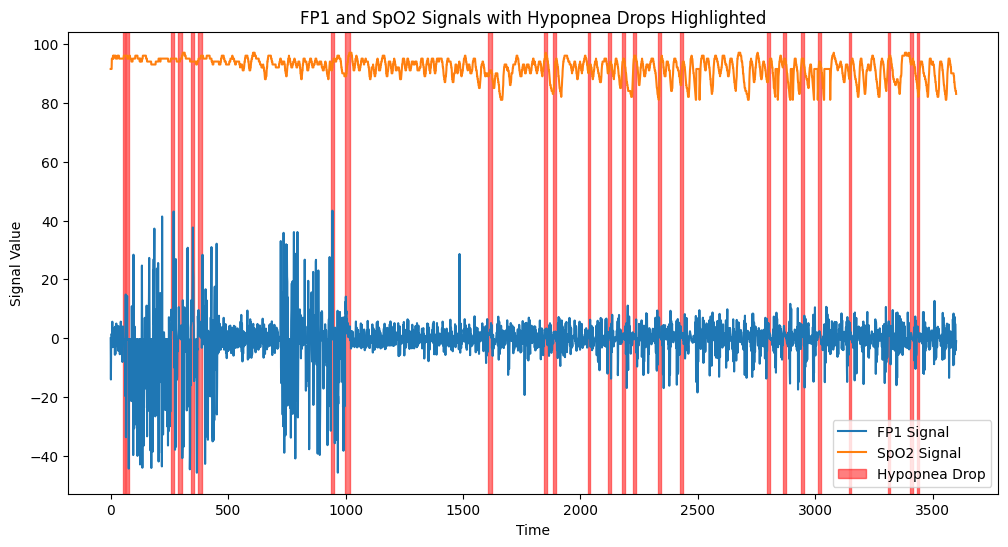

Number of fp1 drops in hour 2: 0
Time of drops: []


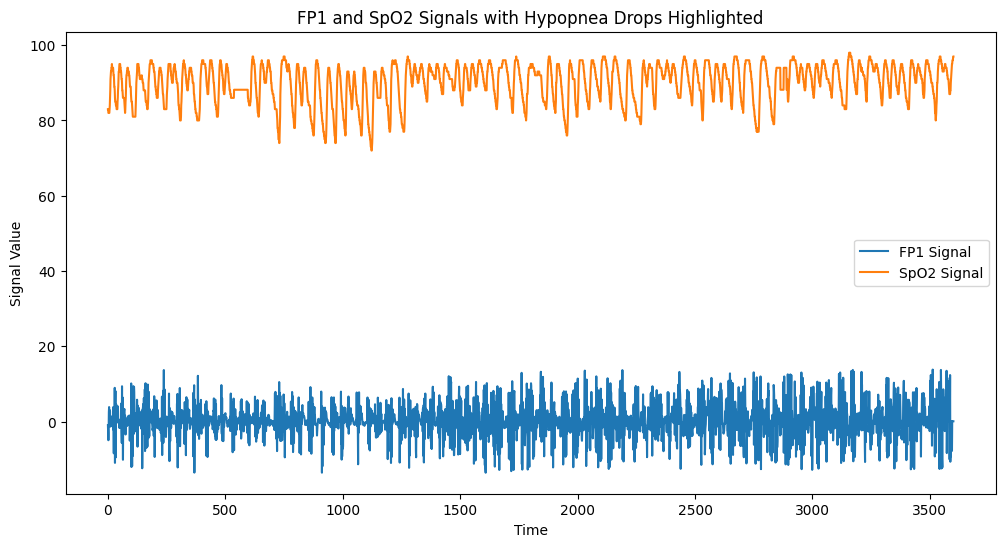

Number of fp1 drops in hour 3: 0
Time of drops: []


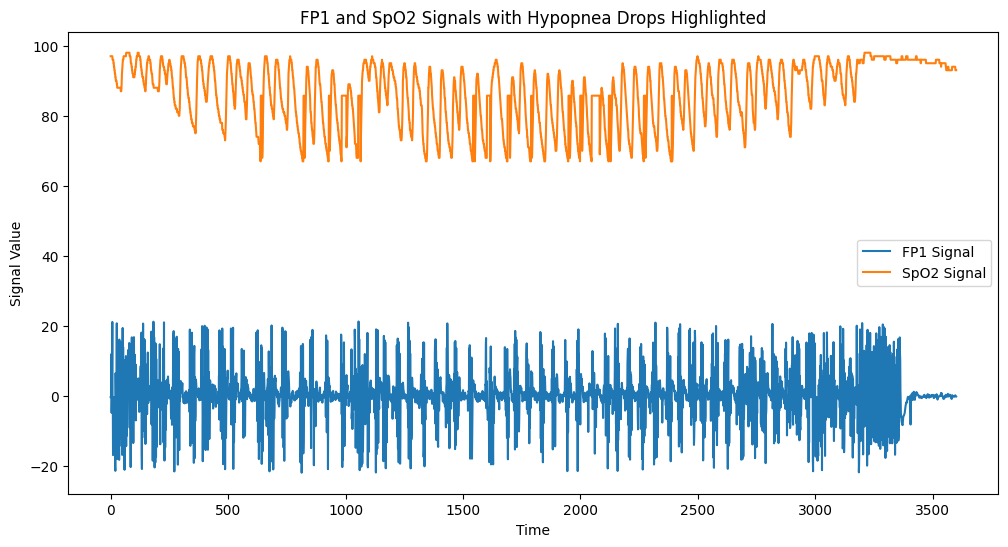

Number of fp1 drops in hour 4: 15
Time of drops: [(239.06640733537097, 249.06918588496808), (401.11141983884414, 411.11419838844125), (1646.4573492636846, 1657.4604056682413), (1788.4968046679635, 1798.4995832175605), (1918.5329258127258, 1930.5362600722424), (2063.573214781884, 2077.57710475132), (2278.632953598222, 2288.635732147819), (2679.744373437066, 2690.7474298416228), (2898.805223673243, 2908.80800222284), (2917.810502917477, 2929.8138371769937), (2970.825229230342, 2980.828007779939), (3006.8352320088916, 3016.838010558489), (3075.8544040011116, 3087.857738260628), (3416.949152542373, 3428.95248680189), (3447.957766046124, 3458.960822450681)]


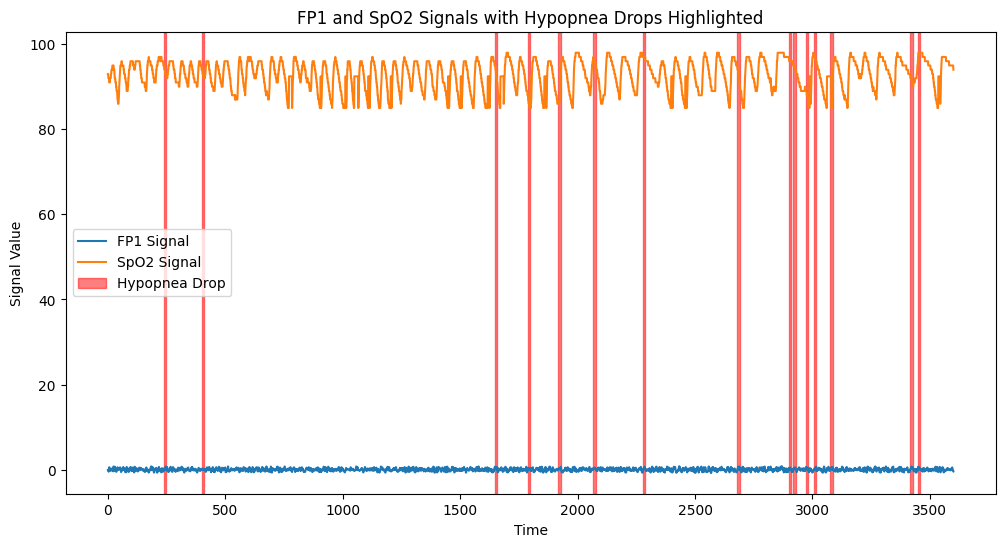

Number of fp1 drops in hour 5: 14
Time of drops: [(386.1072520144485, 398.110586273965), (556.1544873575994, 566.1572659071965), (694.1928313420395, 705.1958877465963), (841.233676021117, 856.2378438455127), (972.2700750208392, 986.2739649902752), (1257.3492636843569, 1270.352875798833), (1452.4034454015004, 1462.4062239510977), (1605.4459572103362, 1617.4492914698528), (1884.5234787440957, 1894.5262572936929), (2237.6215615448737, 2248.6246179494306), (2354.65407057516, 2364.656849124757), (2723.7565990552935, 2734.7596554598504), (2909.8082800777997, 2922.811892192276), (3217.8938594053907, 3227.896637954988)]


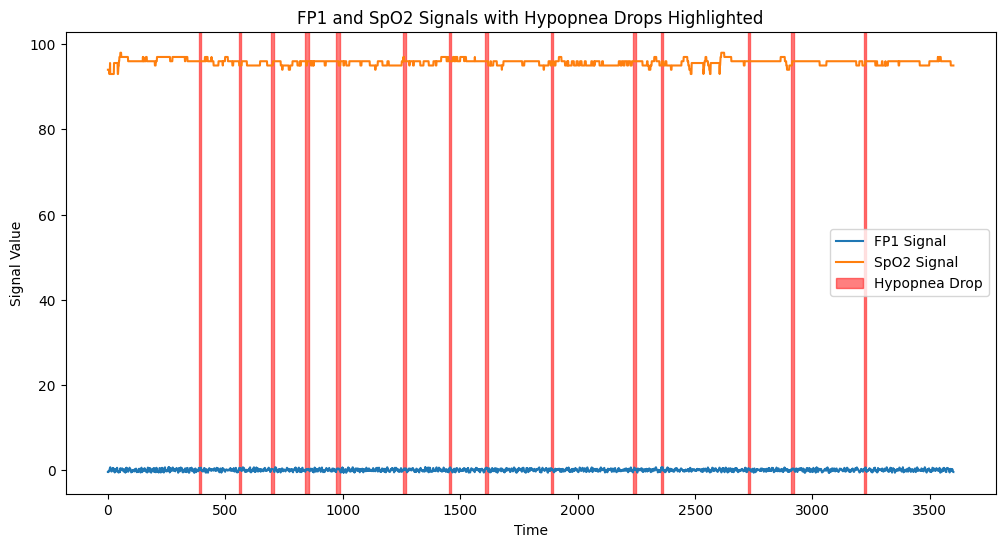

Number of fp1 drops in hour 6: 0
Time of drops: []


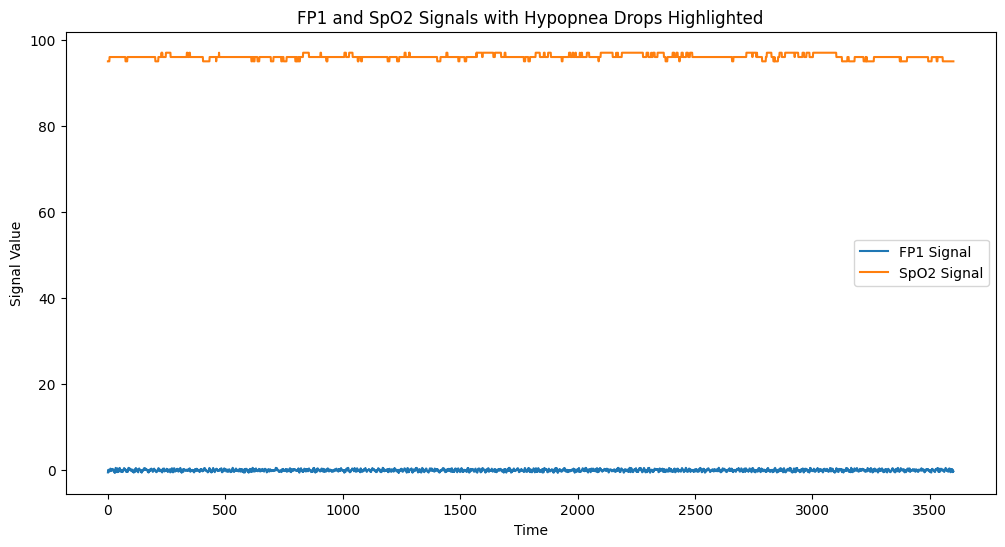

Number of fp1 drops in hour 7: 10
Time of drops: [(328.0911364267852, 338.09391497638234), (369.1025284801334, 381.1058627396499), (1110.3084190052793, 1120.3111975548763), (1294.3595443178663, 1304.3623228674633), (1476.4101139205336, 1487.4131703250905), (1811.5031953320367, 1825.5070853014727), (2146.59627674354, 2156.599055293137), (2477.6882467352043, 2488.691303139761), (2775.7710475131985, 2787.774381772715), (3222.895248680189, 3232.8980272297863)]


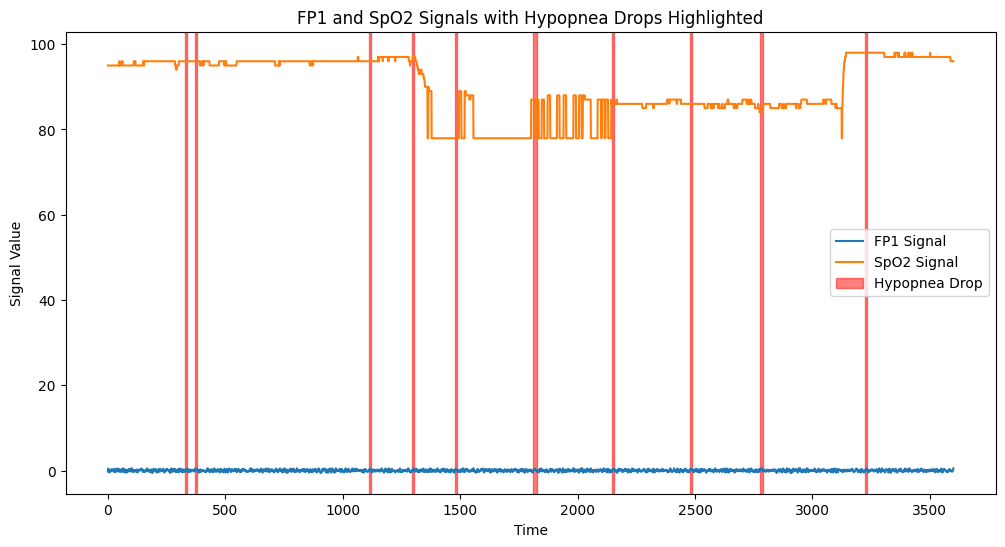

In [34]:
for j in range(7):
    fp1_big = read_file_signal(edf_files_severe[j], npt_index)
    fp1_small = resample_signal(fp1_big, 3600)
    fp1_denoised = thresholding(fp1_small, 2)
    spo2_data = read_file_signal(edf_files_severe[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    timestamps = np.linspace(0, 3600, len(fp1_denoised))
    # print(len(fp1_denoised))
    count, time_drops = count_ob_hypopnea(fp1_denoised, spo2_denoised, timestamps)
    print(f"Number of fp1 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signals_with_drops(fp1_denoised, spo2_denoised, timestamps)

Number of fp1 drops in hour 1: 0
Time of drops: []


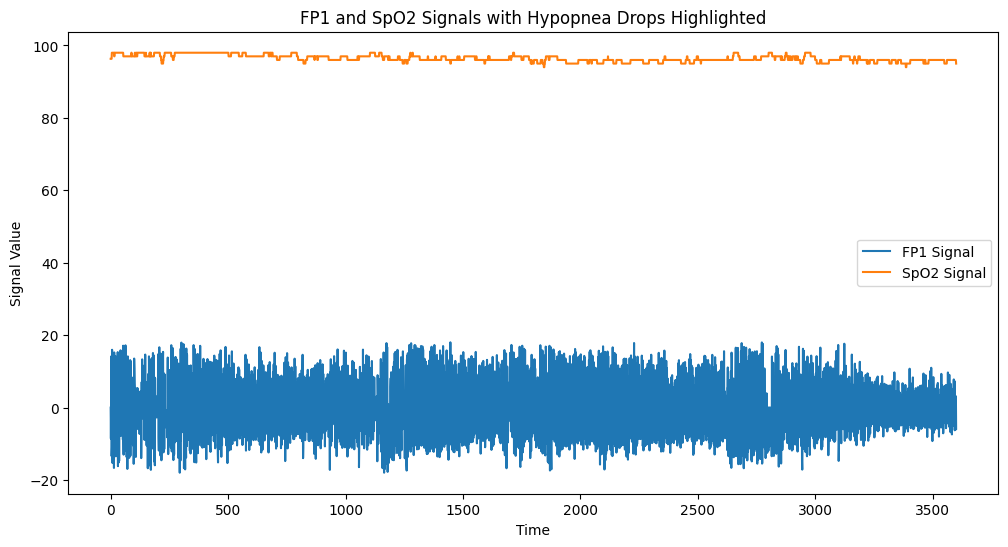

Number of fp1 drops in hour 2: 0
Time of drops: []


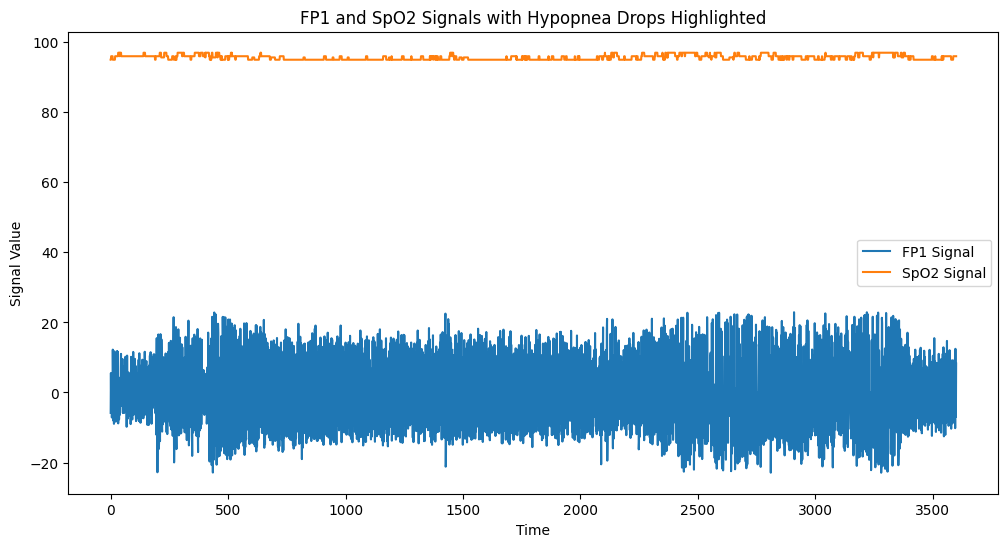

Number of fp1 drops in hour 3: 0
Time of drops: []


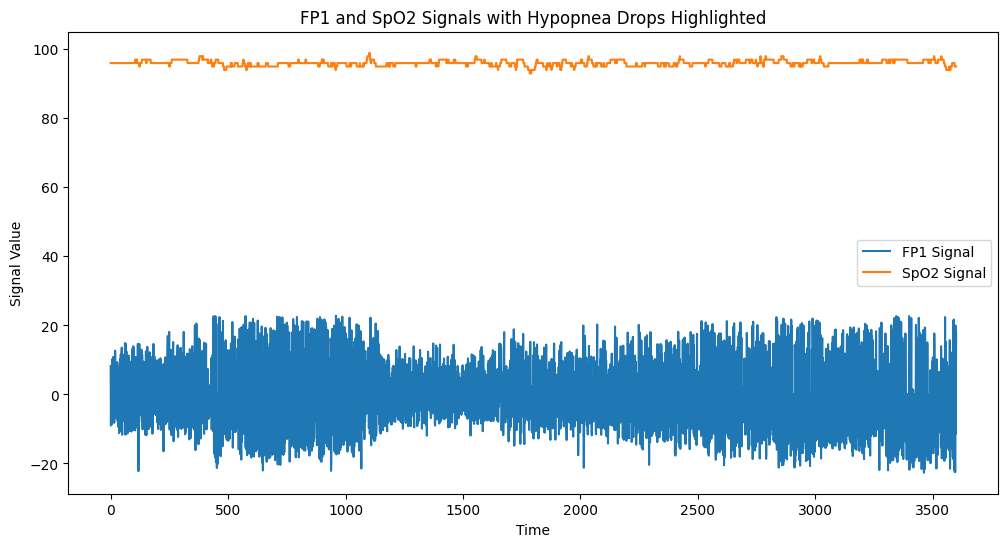

Number of fp1 drops in hour 4: 1
Time of drops: [(1871.5198666296194, 1883.523200889136)]


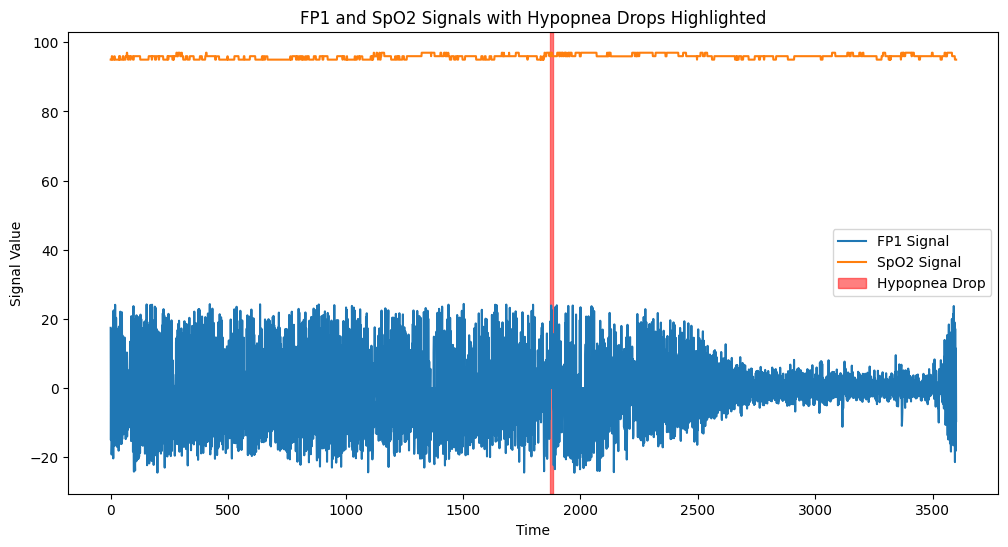

Number of fp1 drops in hour 5: 0
Time of drops: []


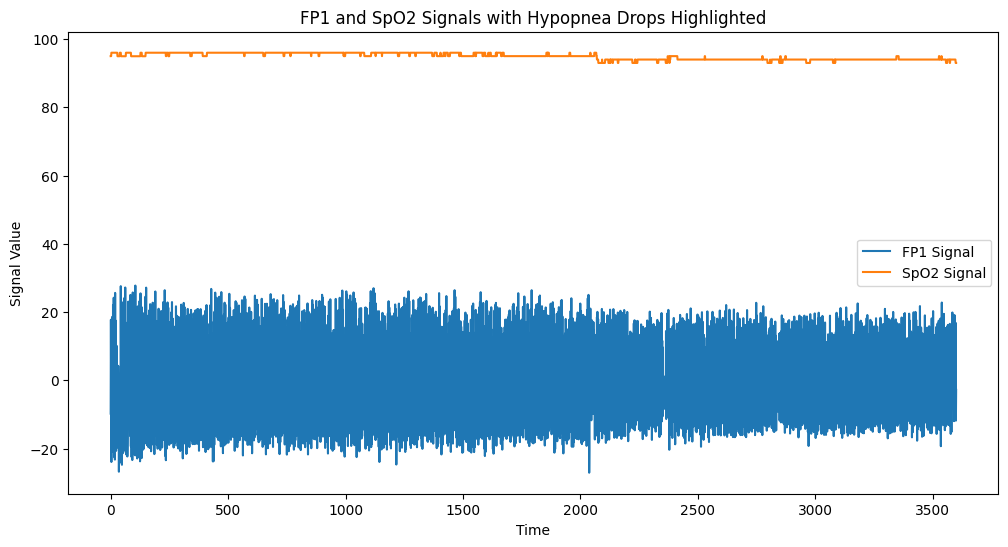

Number of fp1 drops in hour 6: 0
Time of drops: []


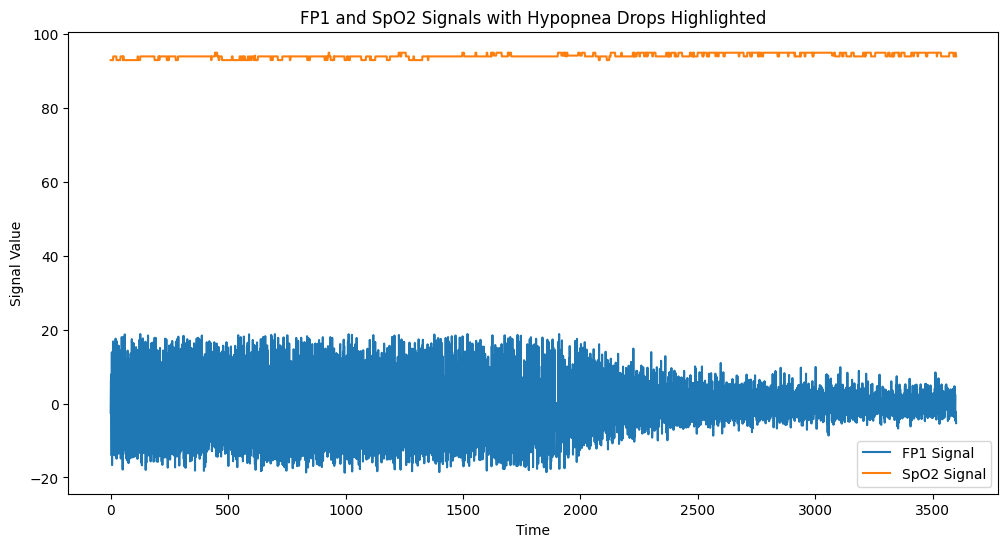

Number of fp1 drops in hour 7: 0
Time of drops: []


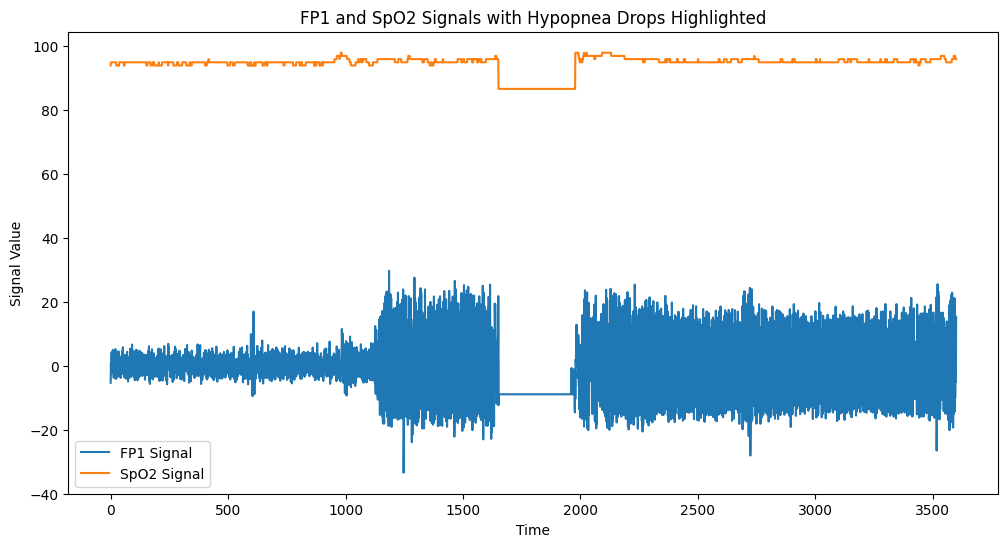

Number of fp1 drops in hour 8: 0
Time of drops: []


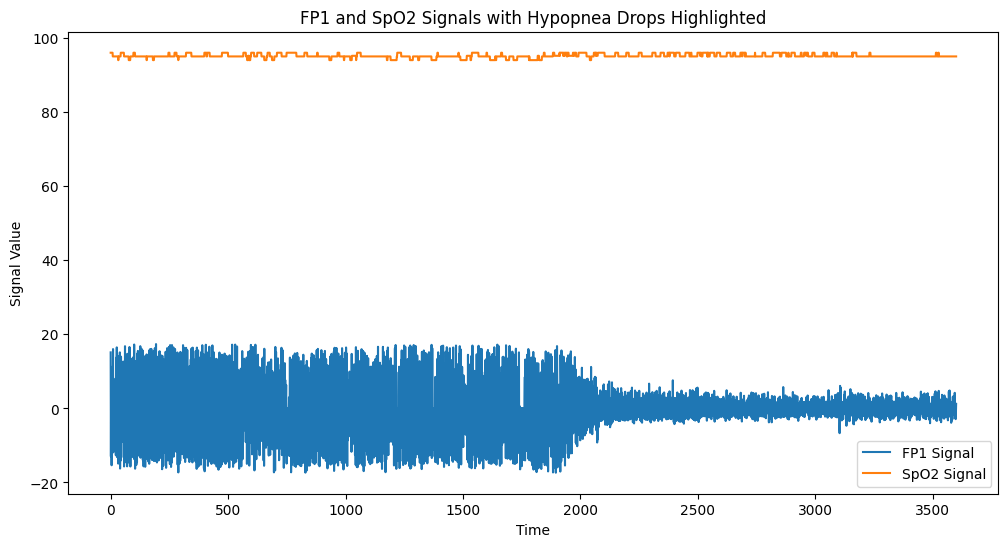

Number of fp1 drops in hour 9: 6
Time of drops: [(2261.628230063907, 2272.6312864684637), (2344.6512920255627, 2357.654904140039), (2638.7329813837177, 2648.735759933315), (2924.8124479021953, 2934.8152264517926), (3167.879966657405, 3182.8841344818006), (3235.8988607946653, 3245.9016393442625)]


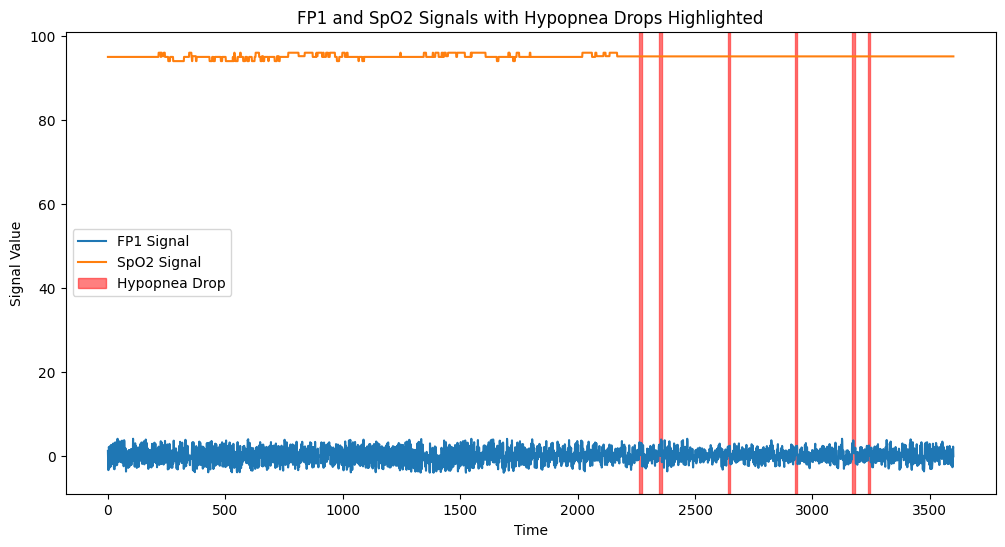

In [52]:
for j in range(9):
    fp1_big = read_file_signal(edf_files_normal[j], npt_index)
    fp1_small = resample_signal(fp1_big, 3600)
    fp1_denoised = thresholding(fp1_small, 2)
    spo2_data = read_file_signal(edf_files_normal[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    if j==8:
        temp = np.concatenate((spo2_denoised, np.full(1432, spo2_denoised.mean())))
        spo2_denoised = temp
    timestamps = np.linspace(0, 3600, len(fp1_denoised))
    # print(len(fp1_denoised))
    count, time_drops = count_ob_hypopnea(fp1_denoised, spo2_denoised, timestamps)
    print(f"Number of fp1 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signals_with_drops(fp1_denoised, spo2_denoised, timestamps)

Number of fp1 drops in hour 1: 8
Time of drops: [(38.01055848846902, 49.013614893025846), (182.05056960266742, 193.05362600722424), (216.0600166712976, 230.06390664073356), (240.06668519033067, 253.0702973048069), (290.0805779383162, 304.0844679077522), (353.098082800778, 364.10113920533485), (446.12392331203114, 458.1272575715477), (2102.5840511253127, 2114.5873853848293)]
3600
3600


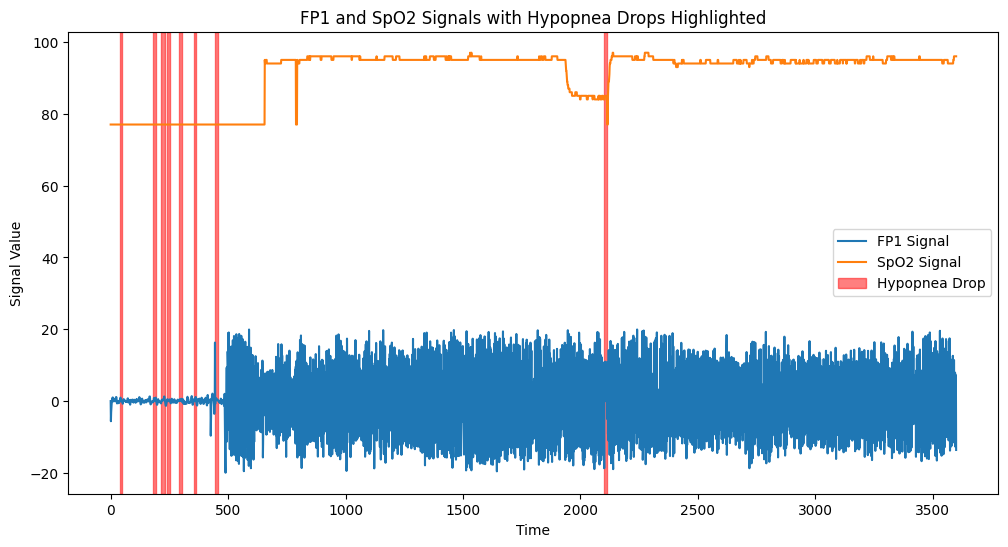

Number of fp1 drops in hour 2: 0
Time of drops: []
3600
3600


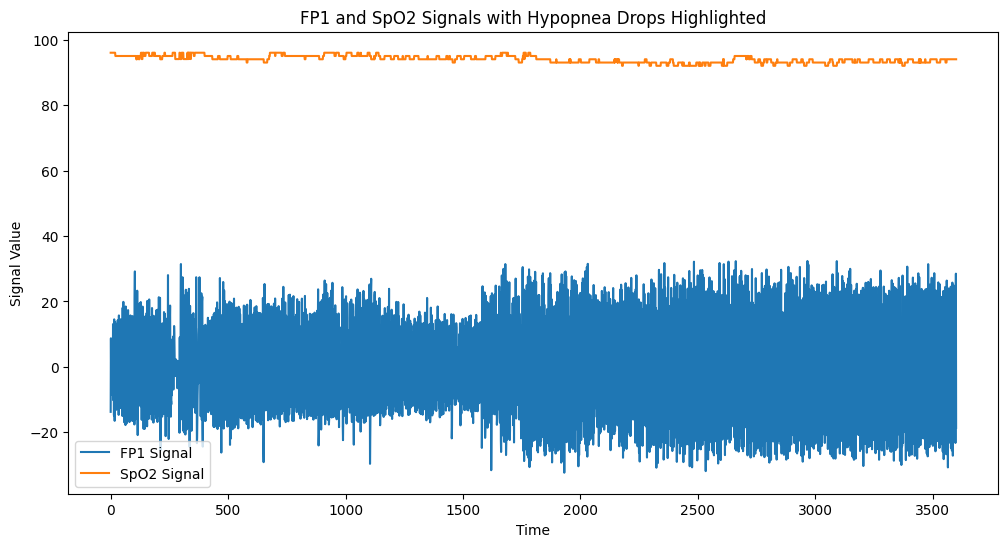

Number of fp1 drops in hour 3: 0
Time of drops: []
3600
3600


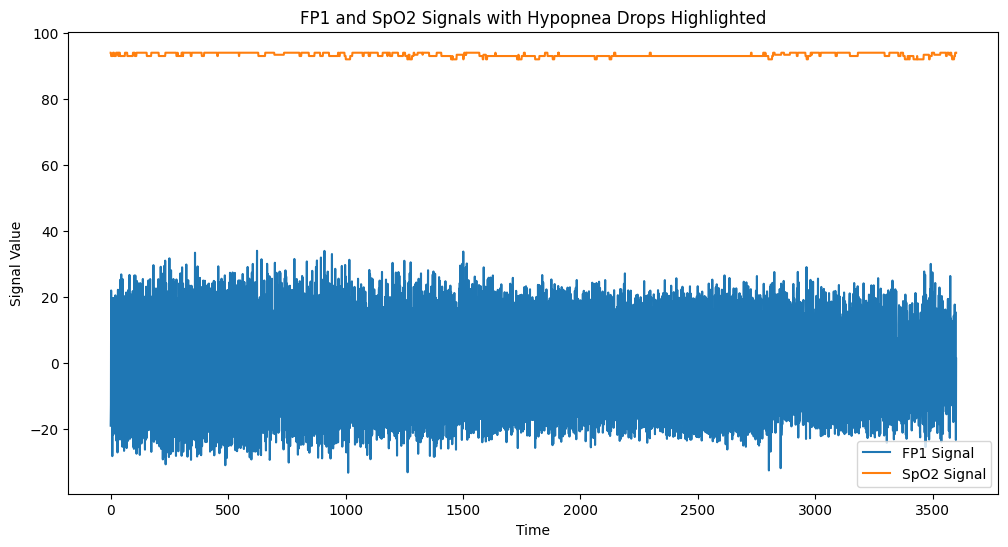

Number of fp1 drops in hour 4: 0
Time of drops: []
3600
3600


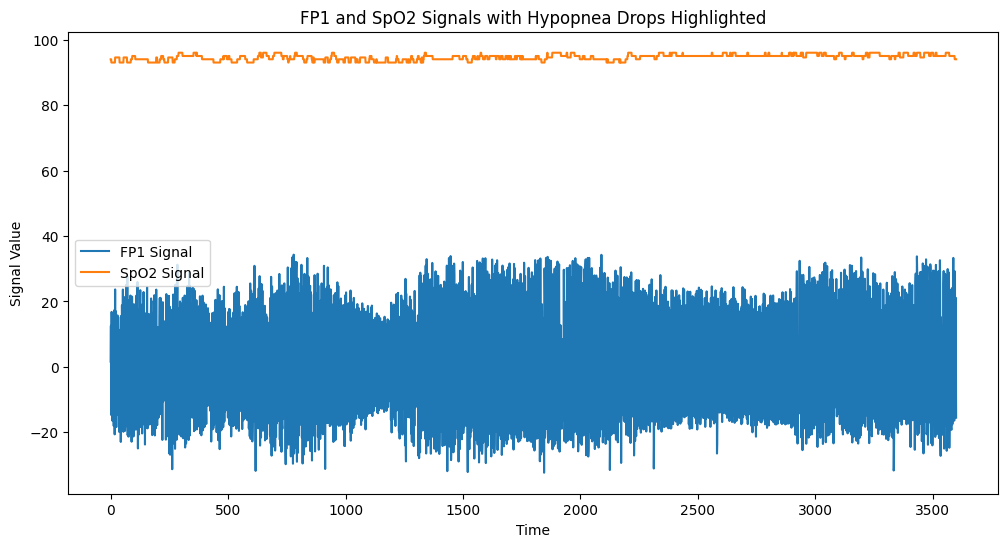

Number of fp1 drops in hour 5: 0
Time of drops: []
3600
3600


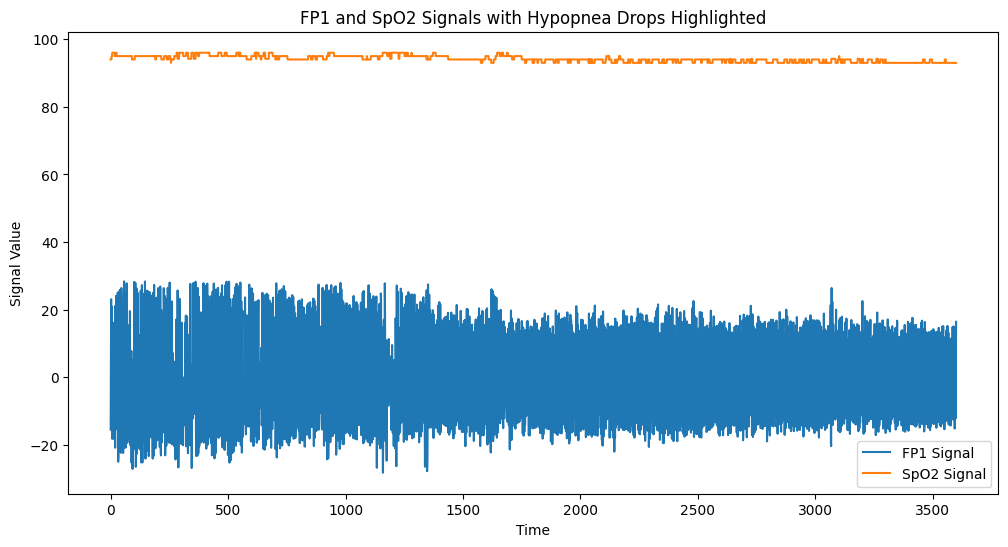

Number of fp1 drops in hour 6: 0
Time of drops: []
3600
3600


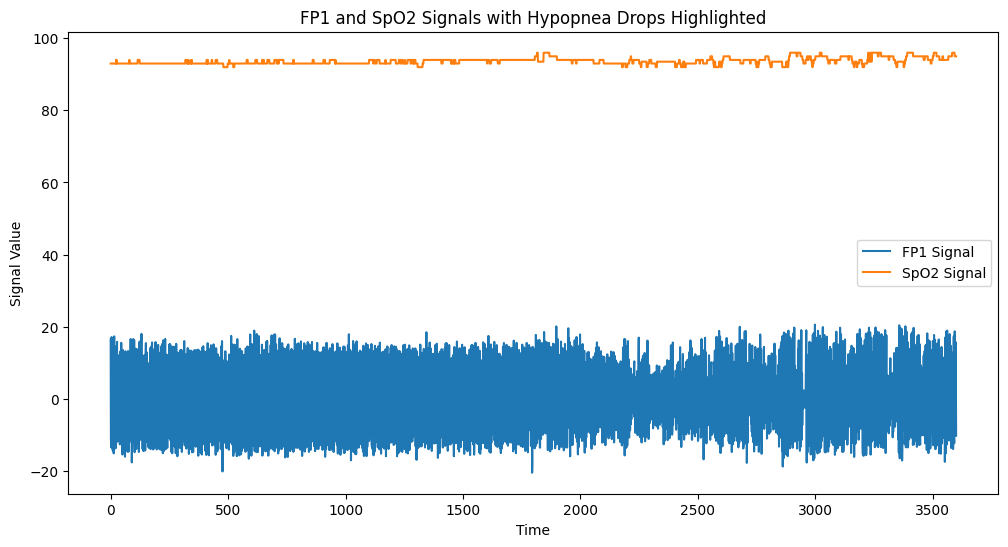

Number of fp1 drops in hour 7: 9
Time of drops: [(2789.7749374826344, 2800.7779938871913), (2859.794387329814, 2870.797443734371), (2985.8293970547375, 3005.834954153932), (3052.848013337038, 3063.851069741595), (3164.879133092526, 3178.883023061962), (3183.8844123367603, 3193.8871908863575), (3316.921367046402, 3330.925257015838), (3511.9755487635457, 3523.9788830230623), (3572.9924979160883, 3582.995276465685)]
3600
3600


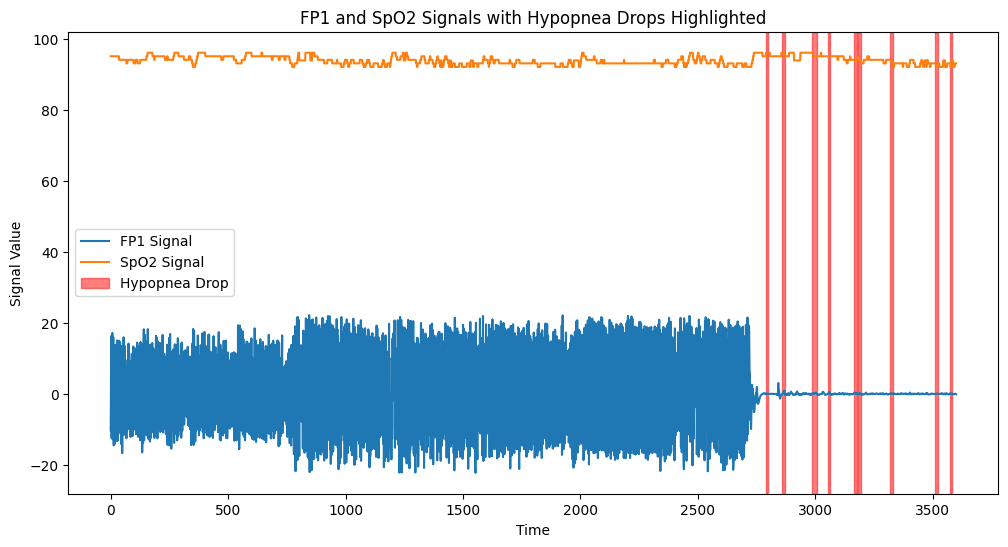

Number of fp1 drops in hour 8: 0
Time of drops: []
3600
3600


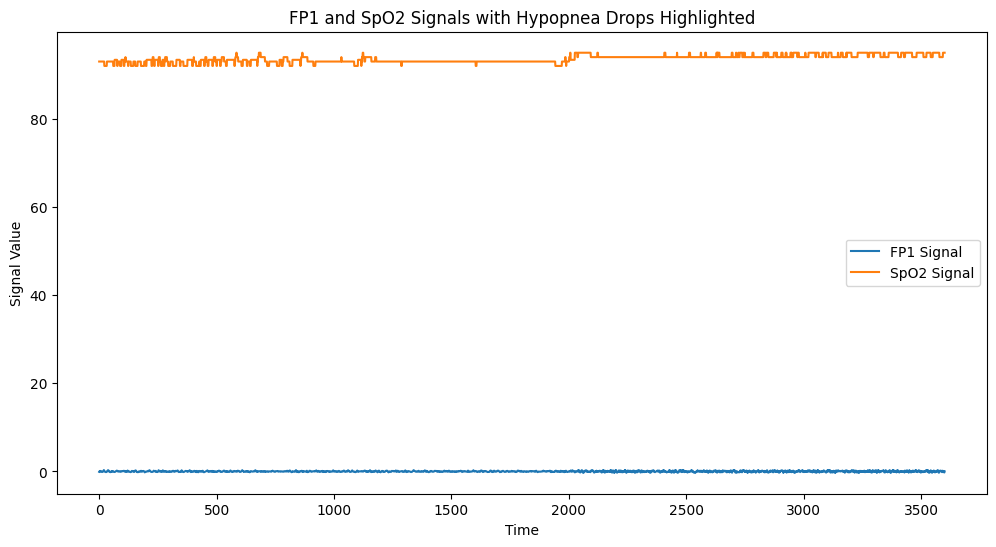

Number of fp1 drops in hour 9: 22
Time of drops: [(268.07446512920257, 278.0772436787997), (713.198110586274, 725.2014448457905), (835.2320088913588, 848.235621005835), (943.2620172270076, 957.2659071964435), (1133.3148096693526, 1143.3175882189498), (1269.3525979438734, 1280.35565434843), (1328.3689913864964, 1338.3717699360934), (1751.486524034454, 1761.4893025840513), (1813.5037510419563, 1823.5065295915533), (1878.5218116143374, 1889.5248680188943), (1949.541539316477, 1963.5454292859129), (2000.5557099194223, 2013.5593220338985), (2087.579883300917, 2100.5834954153934), (2246.624062239511, 2256.6268407891084), (2340.650180605724, 2350.6529591553212), (2381.661572659072, 2396.6657404834677), (2605.7238121700475, 2617.727146429564), (2660.7390941928315, 2673.742706307308), (3003.8343984440125, 3019.838844123368), (3043.845512642401, 3053.848291191998), (3140.872464573493, 3151.8755209780497), (3170.880800222284, 3184.88469019172)]
3600
3600


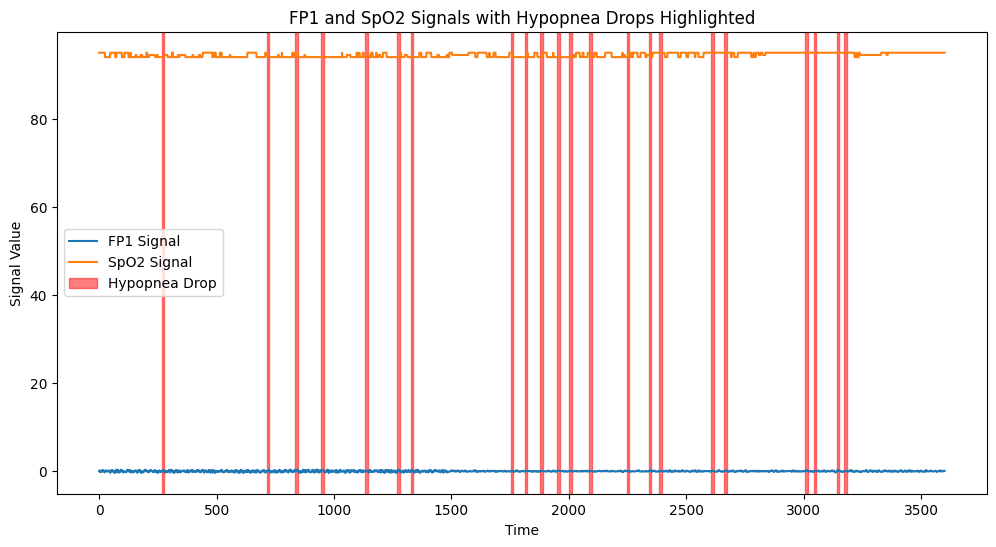

Number of fp1 drops in hour 10: 0
Time of drops: []
3600
3600


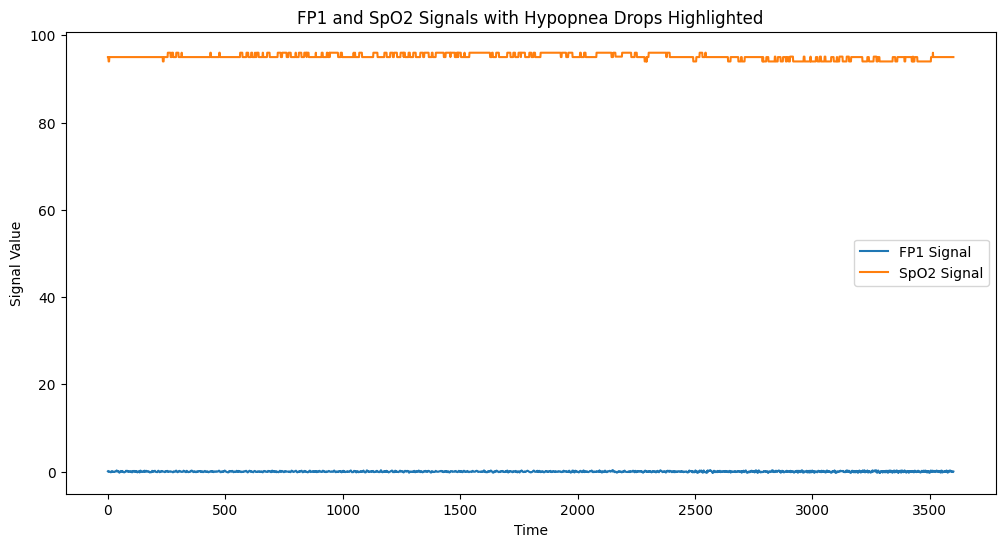

Number of fp1 drops in hour 11: 41
Time of drops: [(82.0227841066963, 156.04334537371494), (288.0800222283968, 324.0900250069464), (361.1003056404557, 371.1030841900528), (399.11086412892473, 445.12364545707146), (501.13920533481524, 553.1536537927202), (572.1589330369547, 595.1653237010281), (659.1831064184496, 713.198110586274), (722.2006112809114, 740.2056126701863), (750.2083912197834, 774.2150597388164), (870.2417338149487, 904.2511808835789), (1051.2920255626564, 1146.3184217838289), (1199.3331480966935, 1220.3389830508474), (1261.3503751041958, 1273.3537093637121), (1296.3601000277856, 1347.374270630731), (1397.3881633787164, 1408.3912197832733), (1448.4023339816617, 1473.4092803556546), (1496.4156710197278, 1555.4320644623508), (1609.4470686301752, 1629.4526257293694), (1693.470408446791, 1720.4779105307032), (1765.49041400389, 1807.502083912198), (1837.5104195609892, 1870.5195887746597), (1872.5201444845793, 1937.5382050569604), (2041.5671019727704, 2054.5707140872464), (2088.

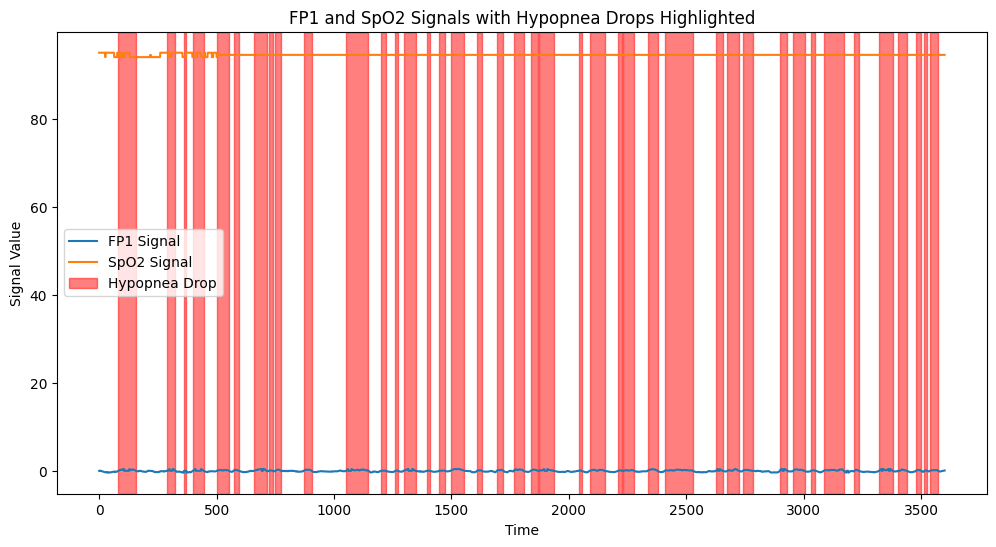

In [47]:
for j in range(11):
    fp1_big = read_file_signal(edf_files_mild[j], npt_index)
    fp1_small = resample_signal(fp1_big, 3600)
    fp1_denoised = thresholding(fp1_small, 2)
    
    spo2_data = read_file_signal(edf_files_mild[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    if j==10:
        temp = np.concatenate((spo2_denoised, np.full(3089, spo2_denoised.mean())))
        spo2_denoised = temp
    
    # Generate timestamps after resampling and thresholding
    timestamps = np.linspace(0, 3600, len(fp1_denoised))
    
    count, time_drops = count_ob_hypopnea(fp1_denoised, spo2_denoised, timestamps)
    print(f"Number of fp1 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    print(len(fp1_denoised))    
    print(len(spo2_denoised))
    plot_signals_with_drops(fp1_denoised, spo2_denoised, timestamps)

Number of fp1 drops in hour 1: 0
Time of drops: []


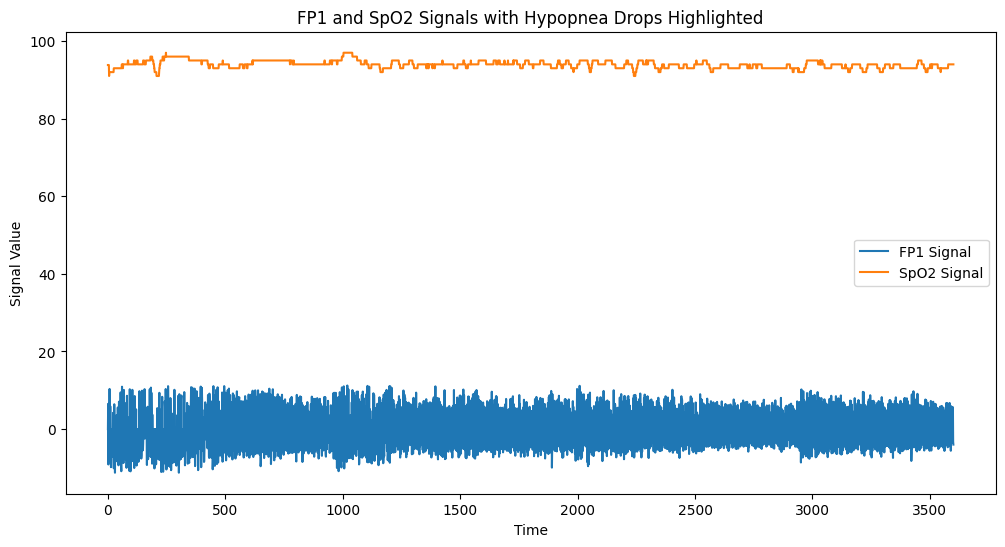

Number of fp1 drops in hour 2: 0
Time of drops: []


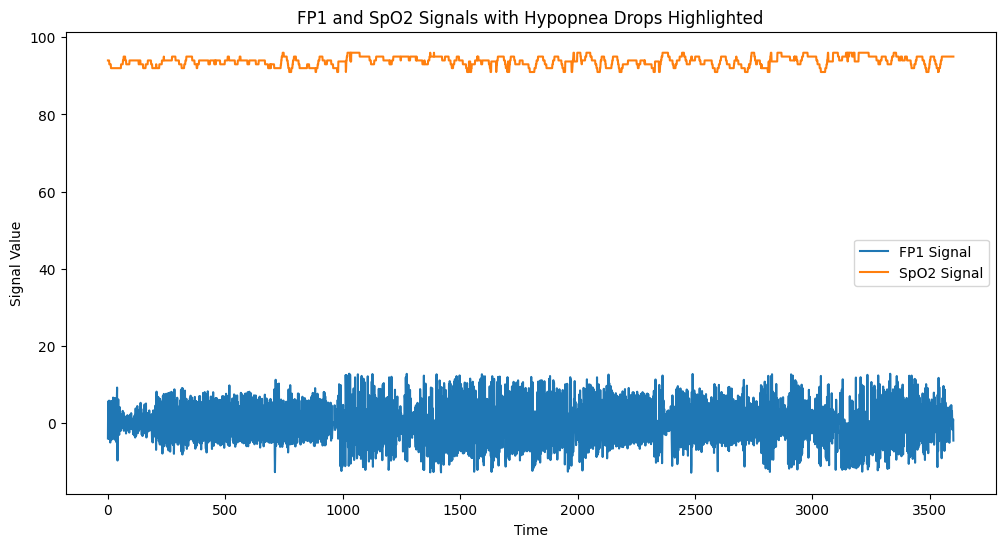

Number of fp1 drops in hour 3: 1
Time of drops: [(1897.527090858572, 1913.5315365379274)]


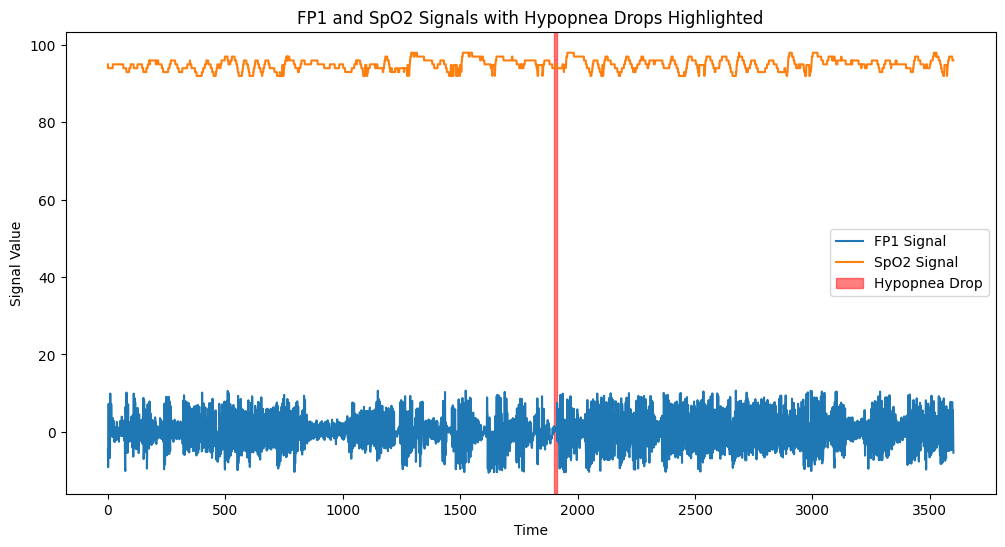

Number of fp1 drops in hour 4: 18
Time of drops: [(197.0547374270631, 208.0577938316199), (225.062517365935, 235.06529591553212), (1802.5006946373994, 1813.5037510419563), (1815.5043067518757, 1826.5073631564326), (2012.5590441789388, 2023.5621005834955), (2126.590719644346, 2144.5957210336205), (2180.6057238121703, 2190.6085023617675), (2218.6162823006393, 2229.6193387051962), (2241.622672964713, 2251.6254515143096), (2271.631008613504, 2285.63489858294), (2550.7085301472634, 2561.7115865518203), (2757.7660461239234, 2769.76938038344), (2819.7832731314256, 2832.786885245902), (3089.8582939705475, 3100.8613503751044), (3227.896637954988, 3237.8994165045847), (3405.9460961378163, 3417.949430397333), (3547.9855515420954, 3557.988330091692), (3585.9961100305645, 3596.999166435121)]


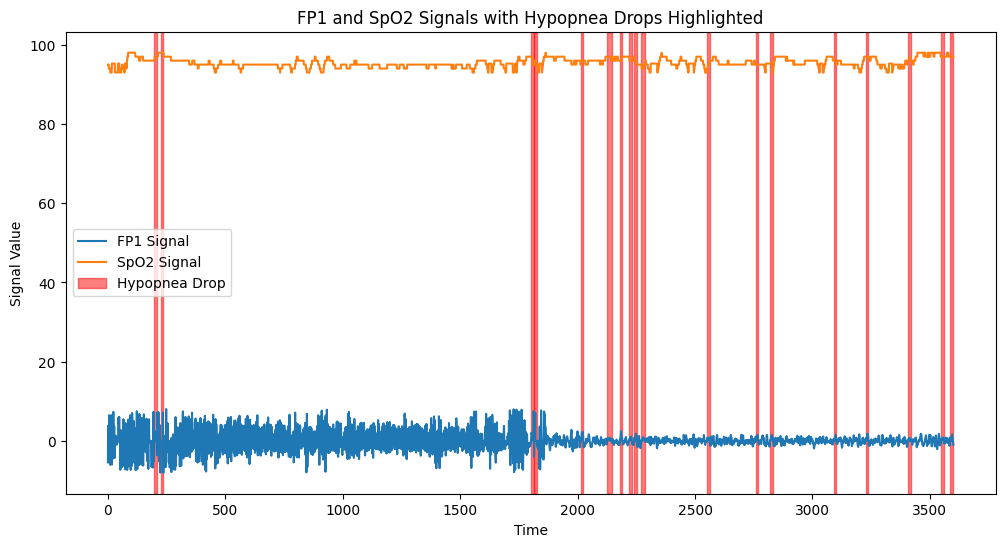

Number of fp1 drops in hour 5: 15
Time of drops: [(767.2131147540985, 778.2161711586552), (906.2517365934983, 916.2545151430954), (1034.2873020283414, 1044.2900805779384), (1365.3792720200056, 1375.3820505696028), (1463.4065018060573, 1479.4109474854126), (1622.4506807446514, 1633.4537371492083), (2073.575993331481, 2084.579049736038), (2287.6354542928593, 2303.6398999722146), (2460.6835232008893, 2470.6863017504866), (2484.6901917199225, 2494.6929702695197), (2564.7124201166994, 2577.7160322311756), (2607.724367879967, 2619.7277021394834), (2848.791330925257, 2861.7949430397334), (2901.806057238122, 2917.810502917477), (3380.9391497638235, 3391.9422061683804)]


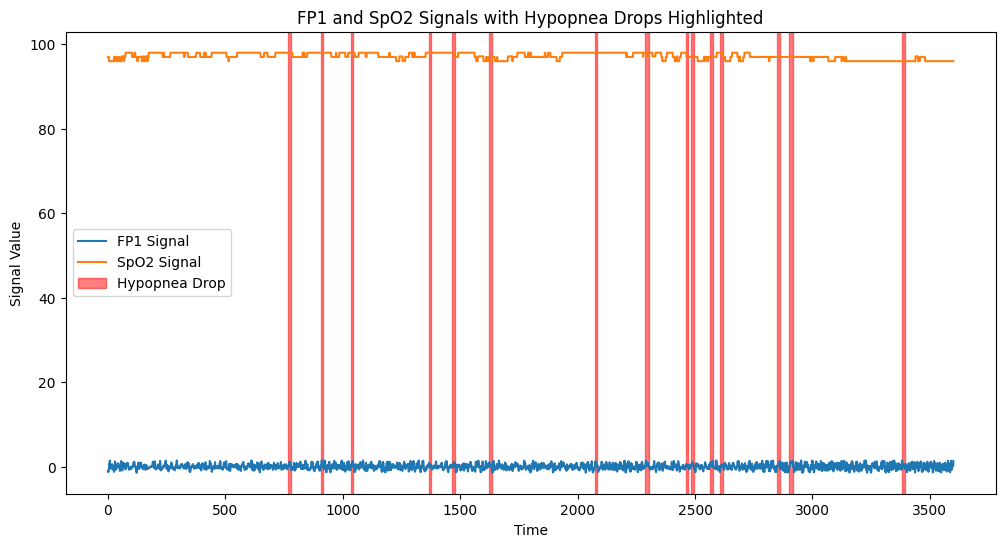

Number of fp1 drops in hour 6: 20
Time of drops: [(20.00555709919422, 32.008891358710756), (88.02445123645458, 98.02722978605169), (142.03945540427898, 154.0427896637955), (177.04918032786887, 187.05195887746598), (310.0861350375104, 322.089469297027), (465.1292025562657, 476.13225896082247), (778.2161711586552, 790.2195054181718), (873.2425673798278, 885.2459016393443), (1170.325090302862, 1181.328146707419), (1402.389552653515, 1415.3931647679913), (1470.4084467907753, 1480.4112253403725), (1670.4640177827175, 1682.467352042234), (1809.5026396221174, 1819.5054181717146), (2046.568491247569, 2057.571547652126), (2473.6871353153656, 2484.6901917199225), (2675.743262017227, 2688.7468741317034), (2758.766323978883, 2768.7691025284803), (3033.8427340928038, 3045.8460683523203), (3522.9786051681026, 3533.9816615726595), (3544.984717977216, 3554.987496526813)]


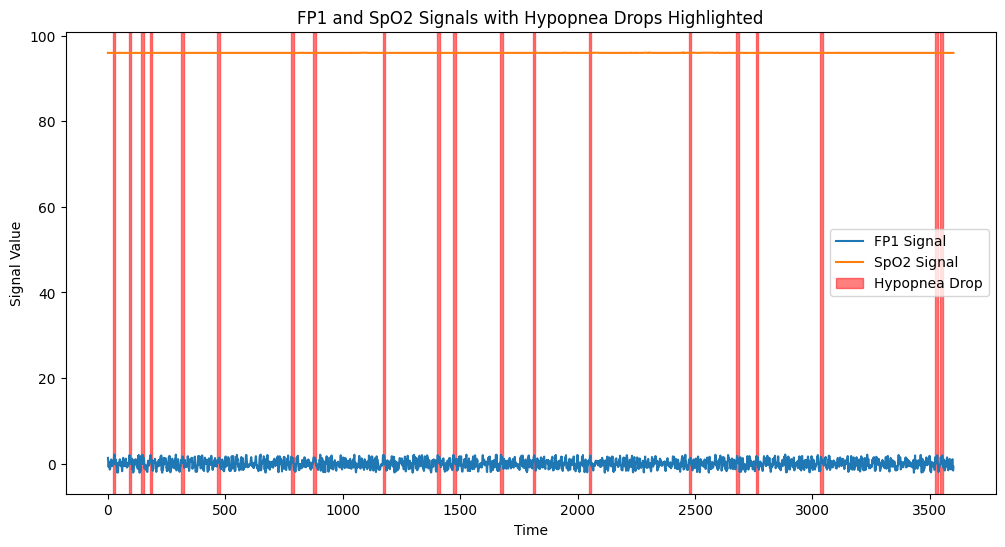

Number of fp1 drops in hour 7: 0
Time of drops: []


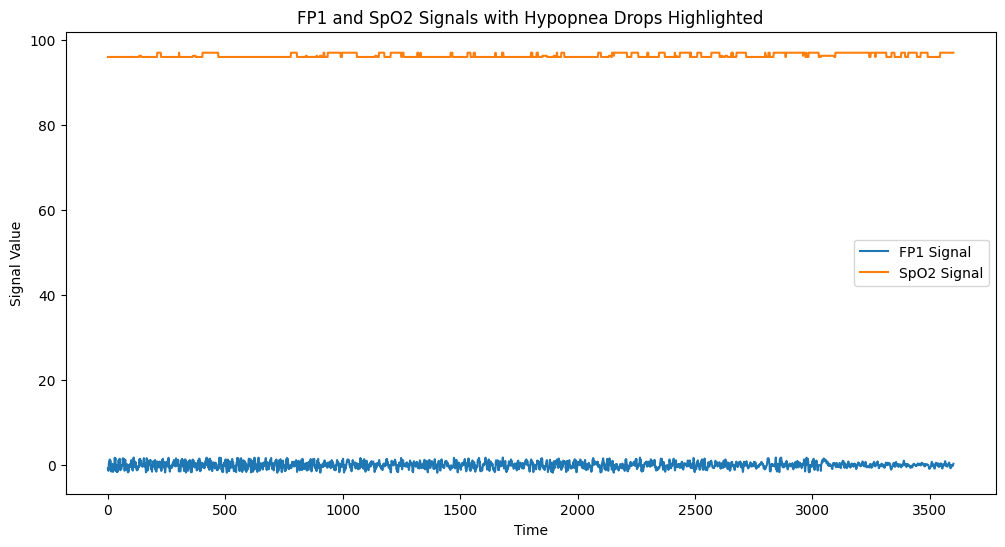

Number of fp1 drops in hour 8: 0
Time of drops: []


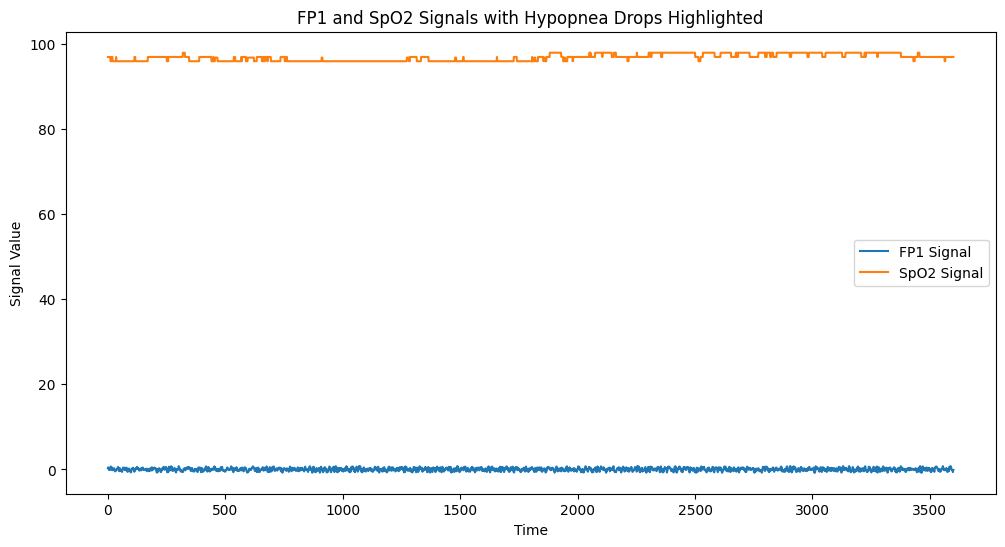

Number of fp1 drops in hour 9: 0
Time of drops: []


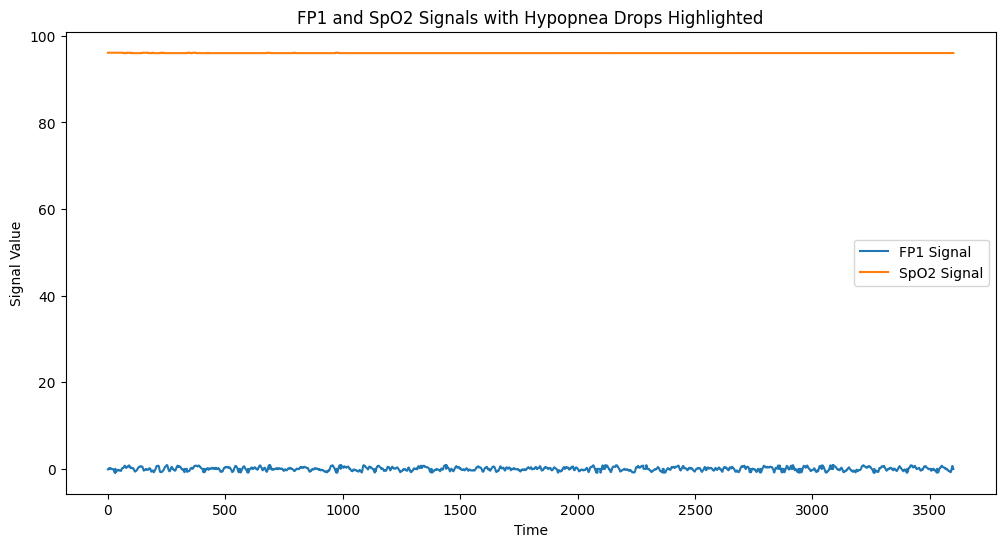

In [55]:
for j in range(9):
    fp1_big = read_file_signal(edf_files_moderate[j], npt_index)
    fp1_small = resample_signal(fp1_big, 3600)
    fp1_denoised = thresholding(fp1_small, 2)
    spo2_data = read_file_signal(edf_files_moderate[j], spo2_index)
    spo2_denoised = thresholding(spo2_data, 2)
    if j==8:
        temp = np.concatenate((spo2_denoised, np.full(2602, spo2_denoised.mean())))
        spo2_denoised = temp
    timestamps = np.linspace(0, 3600, len(fp1_denoised))
    # print(len(fp1_denoised))
    count, time_drops = count_ob_hypopnea(fp1_denoised, spo2_denoised, timestamps)
    print(f"Number of fp1 drops in hour {j + 1}: {count}")
    print(f"Time of drops: {time_drops}")
    plot_signals_with_drops(fp1_denoised, spo2_denoised, timestamps)

In [130]:
def count_ob_hypopnea_2(fp1_data, spo2_data, timestamps):   ##gives wrong results
    mean_fp1 = np.mean(fp1_data)  
    mean_spo2 = np.mean(fp1_data)
    resampled_fp1 = fp1_data.reshape(-1, 100).mean(axis=1)
    drop_start = None
    count = 0
    time_drops = []

    for i in range(1, len(spo2_data)):  ##continue from here
        if (mean_fp1 - resampled_fp1[i])/mean_fp1 >= 0.3 and (mean_spo2 - spo2_data[i])/mean_spo2 >= 0.03:
            if drop_start is None:
                drop_start = timestamps[i]  # Start timing the drop
        else:
            if drop_start is not None and (timestamps[i - 1] - drop_start) >= 10:
                count += 1  # Count the drop
                time_drops.append((drop_start, i))
            drop_start = None  # Reset the drop

    if drop_start is not None and (timestamps[-1] - drop_start) >= 10:
        count += 1
        time_drops.append((drop_start, len(spo2_data)))

    return count, time_drops

In [159]:
spo2_data = combined_signal(edf_files_normal, spo2_index)
spo2_denoised = thresholding(spo2_data, 2)
fp1_data = combined_signal(edf_files_normal, npt_index)
fp1_denoised = thresholding(fp1_data, 2)
fp1_small = resample_signal(fp1_denoised, 32400)
timestamps = np.linspace(0, 32400, len(fp1_denoised))
count, time_drops = count_ob_hypopnea(fp1_small, spo2_denoised, timestamps)
print(f"Number of fp1 drops in 9 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp1 drops in 9 hours: 1
Time of drops: [(323.98964220797023, 32400.0)]


In [160]:
spo2_data = combined_signal(edf_files_mild, spo2_index)
spo2_denoised = thresholding(spo2_data, 2)
fp1_data = combined_signal(edf_files_mild, npt_index)
fp1_denoised = thresholding(fp1_data, 2)
fp1_small = resample_signal(fp1_denoised, 39600)
timestamps = np.linspace(0, 39600, len(fp1_denoised))
count, time_drops = count_ob_hypopnea(fp1_small, spo2_denoised, timestamps)
print(f"Number of fp1 drops in 9 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp1 drops in 9 hours: 3
Time of drops: [(291.7261898403741, 29481), (356.24933752823466, 34634), (381.72670749273027, 39600.0)]


In [161]:
spo2_data = combined_signal(edf_files_moderate, spo2_index)
spo2_denoised = thresholding(spo2_data, 2)
fp1_data = combined_signal(edf_files_moderate, npt_index)
fp1_denoised = thresholding(fp1_data, 2)
fp1_small = resample_signal(fp1_denoised, 32400)
timestamps = np.linspace(0, 32400, len(fp1_denoised))
count, time_drops = count_ob_hypopnea(fp1_small, spo2_denoised, timestamps)
print(f"Number of fp1 drops in 9 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp1 drops in 9 hours: 1
Time of drops: [(323.98923551554986, 32400.0)]


In [162]:
spo2_data = combined_signal(edf_files_severe, spo2_index)
spo2_denoised = thresholding(spo2_data, 2)
fp1_data = combined_signal(edf_files_severe, npt_index)
fp1_denoised = thresholding(fp1_data, 2)
fp1_small = resample_signal(fp1_denoised, 25200)
timestamps = np.linspace(0, 25200, len(fp1_denoised))
count, time_drops = count_ob_hypopnea(fp1_small, spo2_denoised, timestamps)
print(f"Number of fp1 drops in 9 hours: {count}")
print(f"Time of drops: {time_drops}")

Number of fp1 drops in 9 hours: 0
Time of drops: []
